In [ ]:
#서울시 침수 흔적도 

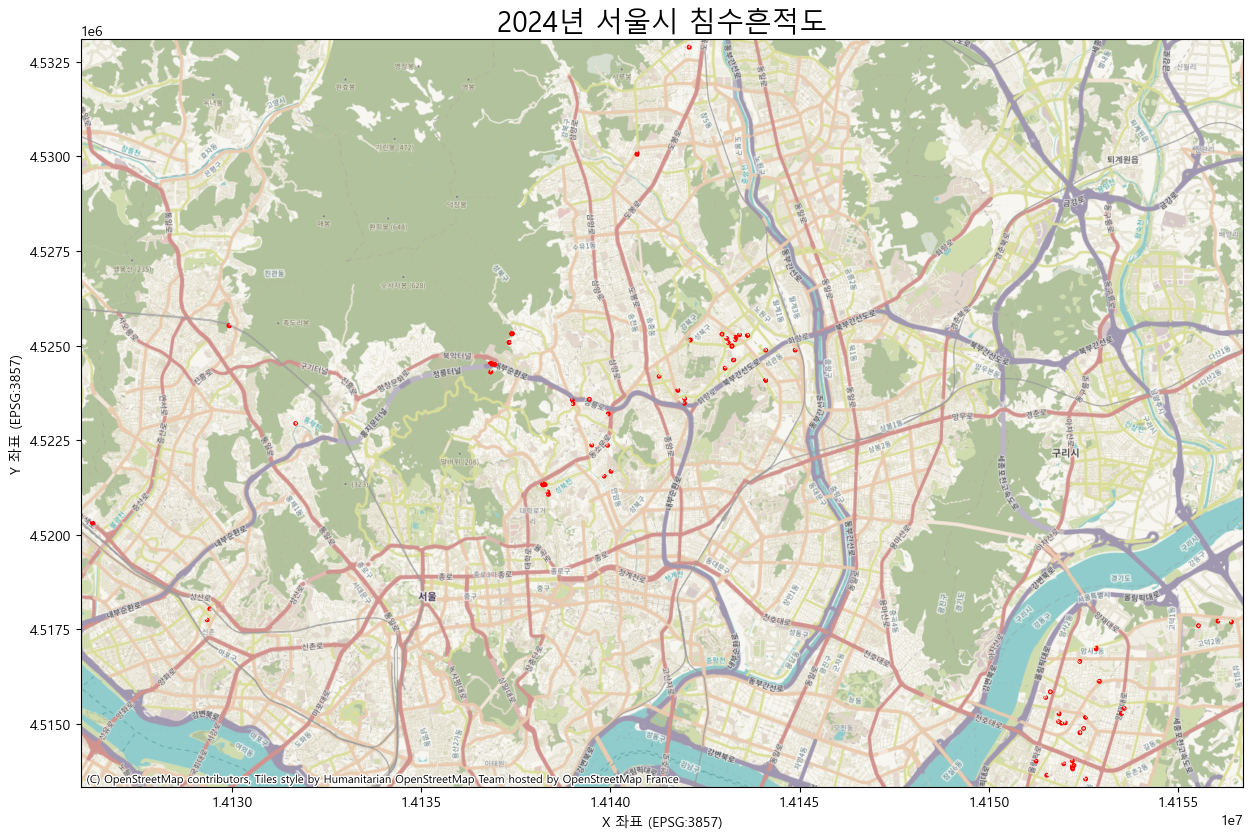

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import contextily as cx

# .shp 파일 경로
shp_file_path = r"data/2024_서울시_침수흔적도.shp"

try:
    gdf = gpd.read_file(shp_file_path, encoding='euc-kr')

    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False

    gdf_web_mercator = gdf.to_crs(epsg=3857)

    ax = gdf_web_mercator.plot(
        figsize=(15, 15),
        edgecolor='red',
        facecolor='red',
        alpha=1.0,              # 투명도를 1.0으로 설정하여 불투명하게
        linewidth=3.0,          # 선 두께를 3.0
        markersize=150          # 점의 크기를 150
    )

    minx_wm, miny_wm, maxx_wm, maxy_wm = gdf_web_mercator.total_bounds
    margin_x_wm = (maxx_wm - minx_wm) * 0.01
    margin_y_wm = (maxy_wm - miny_wm) * 0.01
    ax.set_xlim(minx_wm - margin_x_wm, maxx_wm + margin_x_wm)
    ax.set_ylim(miny_wm - margin_y_wm, maxy_wm + margin_y_wm)
    
    # zoom 레벨
    cx.add_basemap(ax, crs=gdf_web_mercator.crs, zoom=13) 

    plt.title('2024년 서울시 침수흔적도', fontsize=20)
    plt.xlabel('X 좌표 (EPSG:3857)')
    plt.ylabel('Y 좌표 (EPSG:3857)')

    plt.show()

except Exception as e:
    print(f"파일 로드 중 오류 발생: {e}")
    print("경로 오류 확인하기기.")

In [ ]:
#서울시 강수량

CSV 파일 로드 성공!
        년월   지점  강수량(mm)
0  2020-01  108     60.5
1  2020-02  108     53.1
2  2020-03  108     16.3
3  2020-04  108     16.9
4  2020-05  108    112.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   년월       65 non-null     object 
 1   지점       65 non-null     int64  
 2   강수량(mm)  65 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB
None


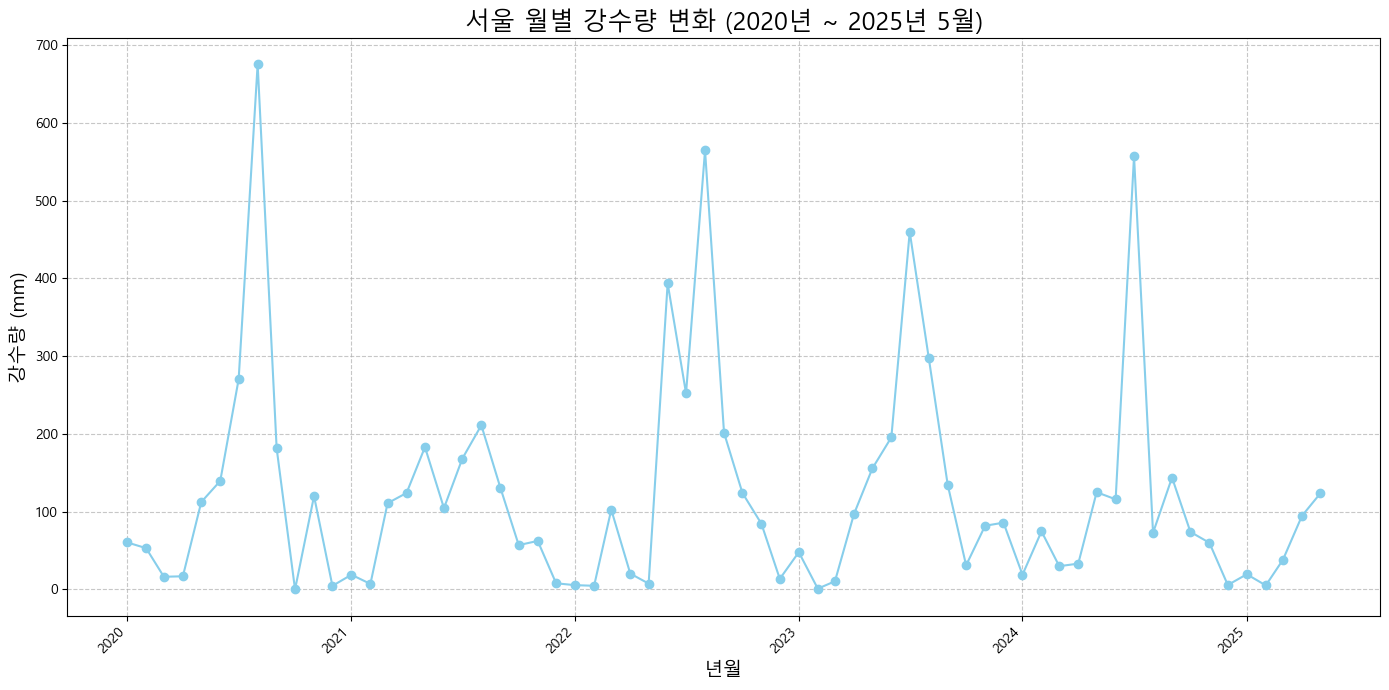

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# CSV 파일 경로 
csv_file_path = r"C:\Users\yues7\data_B_project\data\n_20250528210529.csv"

try:
    df_rain = pd.read_csv(
        csv_file_path,
        skiprows=8,  # 헤더 줄까지 건너뛰고 실제 데이터부터 읽음
        names=['년월', '지점', '강수량(mm)'], # 컬럼 이름을 직접 명시
        encoding='cp949' # 파일 인코딩 지정
    )

    print("CSV 파일 로드 성공!")
    print(df_rain.head())
    print(df_rain.info())

    # '년월' 컬럼을 datetime 형식으로 변환
    df_rain['년월'] = pd.to_datetime(df_rain['년월'])

    # '강수량(mm)' 컬럼을 숫자로 변환
    # 혹시 데이터에 숫자로 변환할 수 없는 값이 있다면 NaN으로 만들고, 나중에 해당 행을 제거
    df_rain['강수량(mm)'] = pd.to_numeric(df_rain['강수량(mm)'], errors='coerce')

    # 강수량 데이터가 NaN인 행 제거
    df_rain.dropna(subset=['강수량(mm)'], inplace=True)

    # 한글 폰트 설정 (Windows 사용자 기준)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

    # 그래프 그리기
    plt.figure(figsize=(14, 7)) # 그래프 크기 설정

    # 월별 강수량 꺾은선 그래프
    # '지점' 컬럼은 모두 '108'이므로, 별도로 그룹화할 필요 없이 전체 데이터를 그린다.
    plt.plot(df_rain['년월'], df_rain['강수량(mm)'], marker='o', linestyle='-', color='skyblue')

    plt.title('서울 월별 강수량 변화 (2020년 ~ 2025년 5월)', fontsize=18)
    plt.xlabel('년월', fontsize=14)
    plt.ylabel('강수량 (mm)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7) # 격자 추가
    plt.xticks(rotation=45, ha='right') # x축 라벨 회전 및 정렬
    plt.tight_layout() # 그래프 요소들이 잘 보이도록 자동 조정
    plt.show()
    

except FileNotFoundError:
    print(f"오류: '{csv_file_path}' 파일을 찾기 불가.  파일 경로와 이름이 정확한지 확인해보기")
    print("혹시 파일이 다른 위치에 확인해보기기.")
except pd.errors.EmptyDataError:
    print(f"오류: '{csv_file_path}' 파일이 비어 있음음")
except Exception as e:
    print(f"데이터 처리 또는 시각화 중 오류 발생: {e}")

    if "Permission denied" in str(e):
        print("파일 또는 폴더의 권한을 확인해보기.")

In [ ]:
#하천 수위 관측

총 354개의 CSV 파일을 찾았습니다. 데이터 로드를 시작합니다.
'계성교2014.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'계성교2015.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'계성교2016.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'계성교2017.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'계성교2018.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'계성교2020.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'계성교2021.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2003.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2004.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2005.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2006.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2007.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2008.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2009.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2010.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2011.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2012.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2013.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2014.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2015.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2016.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확인 성공.
'고척교2017.csv' 파일 'utf-8' 인코딩 및 기본 컬럼 확

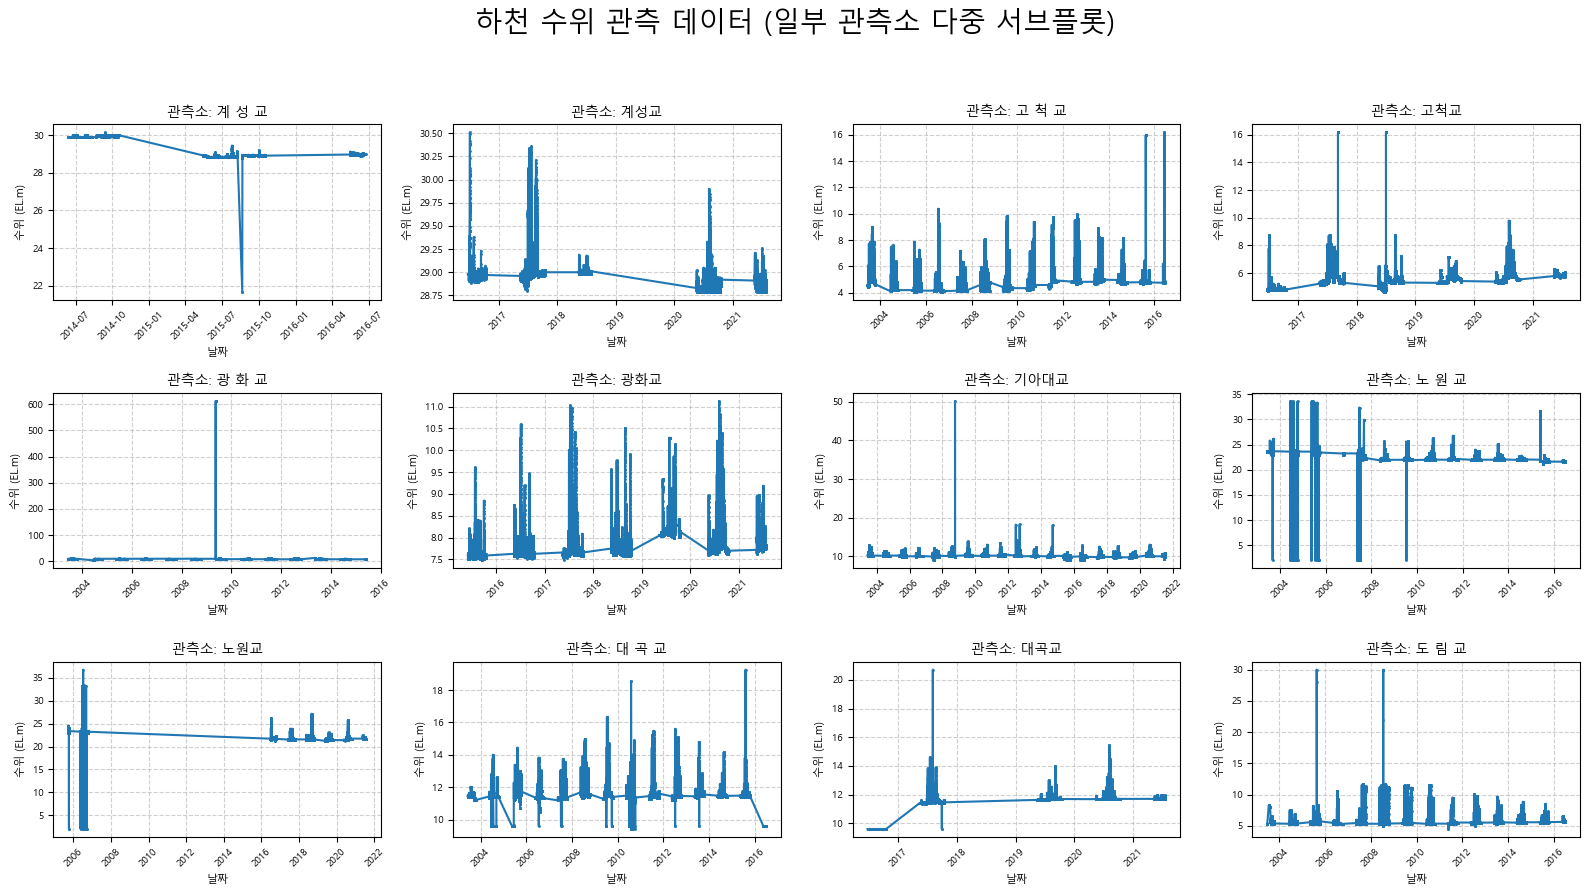

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import glob 

# 1. 모든 CSV 파일 경로 가져오기
data_folder = r'C:\Users\yues7\data_B_project\data\rainfall_data' # 335개 CSV 파일이 담긴 폴더 경로

csv_files = glob.glob(os.path.join(data_folder, '*.csv'))

if not csv_files:
    print(f"오류: '{data_folder}' 폴더에서 CSV 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
else:
    print(f"총 {len(csv_files)}개의 CSV 파일을 찾았습니다. 데이터 로드를 시작합니다.")

    all_dataframes = [] # 각 CSV 파일에서 읽은 DataFrame을 저장할 리스트

    # 실제 파일에서 확인된 컬럼명 정의
    station_col_actual = '관측소명'
    date_col_actual = '시간'
    water_level_col_actual = '수위'
    
    # 표준화할 컬럼명 (시각화 등에 사용할 이름)
    station_col_standard = '관측소명'
    date_col_standard = '날짜'
    water_level_col_standard = '수위 (EL.m)'

    # 2. 각 CSV 파일 읽고 데이터 통합하기
    for file_path in csv_files:
        df = None 
        # 여러 인코딩을 시도하여 파일 읽기 (cp949 -> euc-kr -> utf-8 순서)
        encodings_to_try = ['cp949', 'euc-kr', 'utf-8']
        
        for encoding_name in encodings_to_try:
            try:
                # pd.read_csv로 파일 읽기 (헤더가 첫 줄에 있으므로 header=0)
                df = pd.read_csv(
                    file_path,
                    header=0,  # 첫 번째 줄을 헤더로 사용
                    encoding=encoding_name # 현재 시도할 인코딩 지정
                )
                
                # 컬럼명에 불필요한 공백 제거
                df.columns = df.columns.str.strip() 

                # 실제 컬럼명('관측소명', '시간', '수위')이 모두 존재하는지 확인
                required_actual_columns = [station_col_actual, date_col_actual, water_level_col_actual]
                if not all(col in df.columns for col in required_actual_columns):
                    raise KeyError(f"예상 컬럼 {required_actual_columns} 중 하나 이상을 찾을 수 없습니다. 현재 컬럼: {df.columns.tolist()}")

                print(f"'{os.path.basename(file_path)}' 파일 '{encoding_name}' 인코딩 및 기본 컬럼 확인 성공.")
                break # 인코딩 성공 및 컬럼 확인 완료 시 루프 탈출
            except UnicodeDecodeError:
                continue
            except KeyError as ke: # 예상 컬럼을 찾지 못했을 때의 오류
                continue # 이 경우 다른 인코딩 또는 다른 구조로 시도할 수 있도록 continue
            except pd.errors.ParserError as pe:
                print(f"오류: '{os.path.basename(file_path)}' 파일 '{encoding_name}'로 파싱 중 구조적 오류 발생: {pe}")
                df = None 
                break 
            except Exception as e:
                print(f"오류: '{os.path.basename(file_path)}' 파일 '{encoding_name}'로 처리 중 알 수 없는 오류 발생: {e}")
                df = None
                break 

        if df is not None: # DataFrame이 성공적으로 로드된 경우에만 전처리 진행
            try:
                # 컬럼 이름 표준화 (실제 컬럼명을 표준화된 이름으로 변경)
                if station_col_actual != station_col_standard:
                    df = df.rename(columns={station_col_actual: station_col_standard})
                if date_col_actual != date_col_standard:
                    df = df.rename(columns={date_col_actual: date_col_standard})
                if water_level_col_actual != water_level_col_standard:
                    df = df.rename(columns={water_level_col_actual: water_level_col_standard})

                # 날짜 형식 'YYYY-MM-DD HH:MM'을 명시적으로 지정합니다. (제공된 데이터 샘플 기반)
                df[date_col_standard] = pd.to_datetime(df[date_col_standard], format='%Y-%m-%d %H:%M', errors='coerce') 
                
                # 수위 컬럼을 숫자로 변환 
                df[water_level_col_standard] = pd.to_numeric(df[water_level_col_standard], errors='coerce')
                
                # NaT (날짜 없음) 또는 NaN (숫자 없음) 값 제거
                df.dropna(subset=[date_col_standard, water_level_col_standard], inplace=True)

                if not df.empty: # 전처리 후 데이터가 비어있지 않은 경우에만 all_dataframes 리스트에 추가
                    all_dataframes.append(df)
                else:
                    print(f"경고: '{os.path.basename(file_path)}' 파일은 전처리 후 유효한 데이터가 없습니다.")

            except Exception as e: # 전처리 단계에서 발생할 수 있는 오류
                print(f"오류: '{os.path.basename(file_path)}' 파일 전처리 중 오류 발생: {e}. (데이터 형식 불일치 등)")
        else:
            print(f"오류: '{os.path.basename(file_path)}' 파일을 로드할 수 없습니다 (모든 인코딩 시도 실패 또는 초기 파싱 오류).")


    if all_dataframes: # 하나라도 성공적으로 로드된 DataFrame이 있다면
        # 모든 DataFrame을 하나로 합치기
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        print("\n모든 CSV 파일 데이터 통합 완료!")
        print(combined_df.head()) # 통합된 DataFrame의 첫 5행 출력
        print(combined_df.info()) # 통합된 DataFrame의 정보 출력

        combined_df[station_col_standard] = combined_df[station_col_standard].str.strip()
        unique_stations = combined_df[station_col_standard].unique()
        
        # 3. 다중 서브플롯으로 시각화
        # 한글 폰트 설정 (Windows 사용자 기준, Mac/Linux는 해당 폰트로 변경)
        plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

        # 고유한 지점(station) 목록을 가져옵니다.
        unique_stations = combined_df[station_col_standard].unique()
        num_stations = len(unique_stations) # 총 지점의 수

   
        stations_to_plot = unique_stations[:12] # 기본적으로 처음 12개 지점만 시각화

        num_plots = len(stations_to_plot) # 실제로 그릴 서브플롯의 개수

        # 서브플롯 그리드 크기 계산
        rows = int(num_plots**0.5)
        cols = (num_plots + rows - 1) // rows 
        if rows * cols < num_plots:
            cols += 1

        # fig: 전체 그림 객체, axes: 각 서브플롯 축 객체들의 배열
        fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows)) # figsize는 조절 가능 (각 서브플롯 크기 * 그리드 크기)
        axes = axes.flatten() # 2D 배열인 axes를 1D 배열로 만듭니다. (반복문 처리를 쉽게 하기 위함)

        print(f"\n시각화: 총 {num_plots}개 관측소의 데이터를 다중 서브플롯으로 표시합니다.")

        # 선택된 각 지점별로 서브플롯 그리기
        for i, station_name in enumerate(stations_to_plot): 
            if i < len(axes): # 생성된 서브플롯 공간이 있는 경우에만 그립니다.
                ax = axes[i] # 현재 서브플롯의 축 객체
                # 각 지점별 데이터를 필터링하고 '날짜' 컬럼을 기준으로 정렬합니다.
                station_data = combined_df[combined_df[station_col_standard] == station_name].sort_values(by=date_col_standard)
                
                # 꺾은선 그래프 그리기
                ax.plot(station_data[date_col_standard], station_data[water_level_col_standard], marker='.', linestyle='-', markersize=2)
                
                # 서브플롯 제목 및 축 라벨 설정
                ax.set_title(f'관측소: {station_name}', fontsize=10)
                ax.set_xlabel('날짜', fontsize=8) 
                ax.set_ylabel('수위 (EL.m)', fontsize=8) 
                
                # 축 눈금 라벨 크기 및 회전
                ax.tick_params(axis='x', rotation=45, labelsize=7) 
                ax.tick_params(axis='y', labelsize=7)
                ax.grid(True, linestyle='--', alpha=0.6) # 격자 추가
            else:
                break

        # 사용되지 않는 서브플롯이 있다면 숨깁니다.
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        # 전체 그림에 대한 제목 설정
        plt.suptitle('하천 수위 관측 데이터 (일부 관측소 다중 서브플롯)', fontsize=20, y=1.02)
        # 그래프 요소들이 전체 제목이나 다른 요소와 겹치지 않도록 자동 조정
        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        plt.show()

    else:
        print("\n처리할 데이터가 없거나 모든 파일 처리 중 오류가 발생했습니다.")

In [ ]:
 #서울시 녹지 조사 + 불투수면의 상관관계 (약한 상관관계가 나와버림...)

불투수면 데이터 (tusu.csv):
   연번  자치구  구 전체면적(헥타르)   불투수면적(헥타르)   불투수면적 비율(퍼센트)
0   1  종로구       2312.4         971.6          42.02
1   2   중구        998.2         749.2          75.05
2   3  용산구       2196.7         970.0          44.16
3   4  성동구       1642.2        1040.4          63.36
4   5  광진구       1788.9        1023.9          57.23
녹지 데이터를 가져오는 중: http://openAPI.seoul.go.kr:8088/5747564c75686d79313238505257666c/xml/GeoInfoGreenZoneWGS/1/1000
사용 가능한 총 녹지 레코드: 2249
녹지 데이터를 가져오는 중: http://openAPI.seoul.go.kr:8088/5747564c75686d79313238505257666c/xml/GeoInfoGreenZoneWGS/1001/2000
사용 가능한 총 녹지 레코드: 2249
녹지 데이터를 가져오는 중: http://openAPI.seoul.go.kr:8088/5747564c75686d79313238505257666c/xml/GeoInfoGreenZoneWGS/2001/2249
사용 가능한 총 녹지 레코드: 2249

녹지 데이터 (API에서):
  OBJECTID GRNZN_ID       GLD_NAM GLD_ADDR_KOR GRNZN_CL GLD_CTN_YEAR  \
0      103        0         영등포ic                 도로변녹지            0   
1      105        0       남부순환로수벽                    수벽            0   
2      106        0 

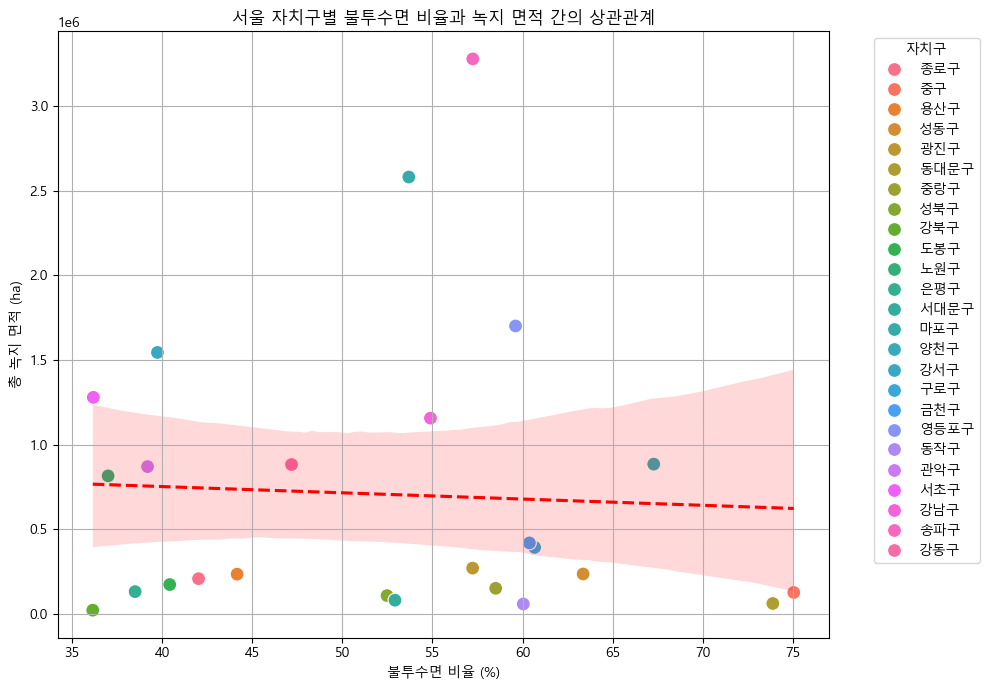

C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\2174686250.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df.sort_values('Impervious_Ratio_percent', ascending=False), x='Gu', y='Impervious_Ratio_percent', palette='viridis')
C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\2174686250.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df.sort_values('Green_Space_Area_ha', ascending=False), x='Gu', y='Green_Space_Area_ha', palette='cividis')


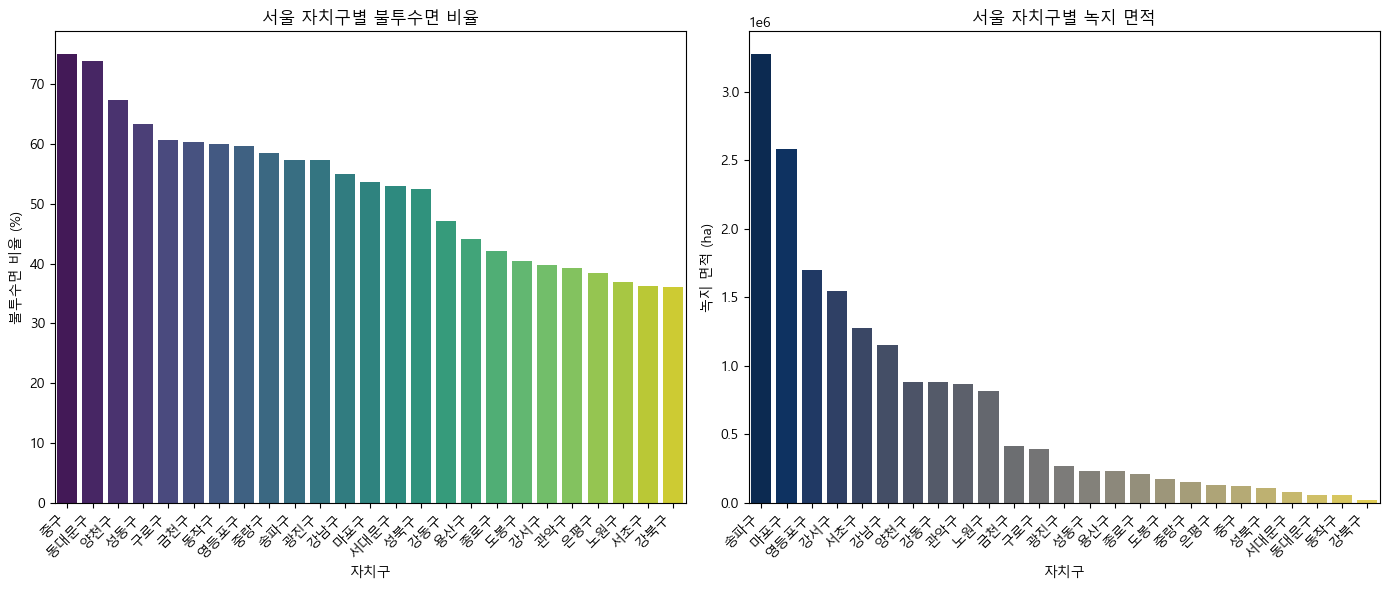

In [15]:
import pandas as pd
import requests
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import platform # 운영체제 정보 확인용

# --- 폰트 설정 ---
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 기본 한글 폰트
elif platform.system() == 'Darwin': # Mac -> 그냥 신기해서.. 해봤어요.. 
    plt.rcParams['font.family'] = 'AppleGothic'
else: # Linux (Colab, Docker 등)
    plt.rcParams['font.family'] = 'NanumGothic' # 나눔 폰트 설치 필요
  
# 마이너스 부호 깨짐 방지 (Matplotlib 기본 설정)
plt.rcParams['axes.unicode_minus'] = False

# --- 1. 데이터 확보 ---

# 불투수면 데이터 불러오기
tusu_df = pd.read_csv(r'C:\Users\yues7\data_B_project\data\tusu.csv', encoding='cp949')
print("불투수면 데이터 (tusu.csv):")
print(tusu_df.head())

# 서울시 오픈 API에서 녹지 데이터
API_KEY = '5747564c75686d79313238505257666c'
BASE_URL = f"http://openAPI.seoul.go.kr:8088/{API_KEY}/xml/GeoInfoGreenZoneWGS/" # API_KEY를 적용했습니다.

start_index = 1
end_index = 1000 

green_space_data = []


while True:
    url = f"{BASE_URL}{start_index}/{end_index}"
    print(f"녹지 데이터를 가져오는 중: {url}")
    try:
        response = requests.get(url)
        response.raise_for_status() # HTTP 오류 발생 시 예외 발생
        root = ET.fromstring(response.content)

        # XML에서 데이터 추출
        rows = root.findall('.//row')
        if not rows:
            break # 더 이상 데이터가 없음

        for row in rows:
            item = {}
            for child in row:
                item[child.tag] = child.text
            green_space_data.append(item)

        # 페이지네이션을 위해 총 개수 확인
        total_count_elem = root.find('.//list_total_count')
        if total_count_elem is not None:
            total_count = int(total_count_elem.text)
            print(f"사용 가능한 총 녹지 레코드: {total_count}")
            if end_index >= total_count:
                break # 모든 데이터를 가져옴
            start_index = end_index + 1
            end_index = min(end_index + 1000, total_count) # 다음 배치 또는 총 개수까지 가져옴
        else:
            print("경고: API 응답에서 'list_total_count'를 찾을 수 없습니다. 단일 페이지 또는 고정 범위를 가정합니다.")
            break # total_count를 찾을 수 없고 페이지네이션이 확실하지 않은 경우 종료

    except requests.exceptions.RequestException as e:
        print(f"데이터 가져오기 오류: {e}")
        break
    except ET.ParseError as e:
        print(f"XML 파싱 오류: {e}")
        break
    except Exception as e:
        print(f"예상치 못한 오류 발생: {e}")
        break

green_space_df = pd.DataFrame(green_space_data)
print("\n녹지 데이터 (API에서):")
print(green_space_df.head())

# --- 2. 데이터 전처리 ---

# 불투수면 데이터 전처리
tusu_df.columns = ['No', 'Gu', 'Total_Area_ha', 'Impervious_Area_ha', 'Impervious_Ratio_percent']
# 숫자 컬럼을 숫자로 변환하고, 오류 발생 시 처리
for col in ['Total_Area_ha', 'Impervious_Area_ha', 'Impervious_Ratio_percent']:
    tusu_df[col] = pd.to_numeric(tusu_df[col], errors='coerce')
tusu_df.dropna(subset=['Impervious_Ratio_percent'], inplace=True) # 불투수면 비율이 없는 행 제거

# 녹지 데이터 전처리
green_space_df_processed = green_space_df[['GRNZN_AR', 'GU_NM']].copy()

# 'GRNZN_AR'을 숫자로 변환하고, 숫자가 아닌 값 처리 
green_space_df_processed['GRNZN_AR'] = pd.to_numeric(green_space_df_processed['GRNZN_AR'], errors='coerce')
green_space_df_processed.dropna(subset=['GRNZN_AR'], inplace=True) # 면적이 유효하지 않은 행 제거

# 자치구별 녹지 면적 집계
green_space_summary = green_space_df_processed.groupby('GU_NM')['GRNZN_AR'].sum().reset_index()
green_space_summary.rename(columns={'GU_NM': 'Gu', 'GRNZN_AR': 'Green_Space_Area_ha'}, inplace=True)
print("\n집계된 녹지 데이터:")
print(green_space_summary.head())

# --- 3. 데이터 병합 ---

# 'Gu' (자치구)를 기준으로 두 데이터프레임 병합
merged_df = pd.merge(tusu_df, green_space_summary, on='Gu', how='inner')
print("\n병합된 데이터:")
print(merged_df.head())

# --- 4. 데이터 분석 ---

# 상관관계 계산
correlation = merged_df['Impervious_Ratio_percent'].corr(merged_df['Green_Space_Area_ha'])
print(f"\n불투수면 비율과 녹지 면적 간의 상관관계: {correlation:.2f}")

# --- 5. 데이터 시각화 ---

plt.figure(figsize=(10, 7))
sns.scatterplot(data=merged_df, x='Impervious_Ratio_percent', y='Green_Space_Area_ha', hue='Gu', s=100)
sns.regplot(data=merged_df, x='Impervious_Ratio_percent', y='Green_Space_Area_ha', scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title('서울 자치구별 불투수면 비율과 녹지 면적 간의 상관관계')
plt.xlabel('불투수면 비율 (%)')
plt.ylabel('총 녹지 면적 (ha)')
plt.grid(True)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 선택 사항: 개별 지표에 대한 막대 차트
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=merged_df.sort_values('Impervious_Ratio_percent', ascending=False), x='Gu', y='Impervious_Ratio_percent', palette='viridis')
plt.title('서울 자치구별 불투수면 비율')
plt.xlabel('자치구')
plt.ylabel('불투수면 비율 (%)')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=merged_df.sort_values('Green_Space_Area_ha', ascending=False), x='Gu', y='Green_Space_Area_ha', palette='cividis')
plt.title('서울 자치구별 녹지 면적')
plt.xlabel('자치구')
plt.ylabel('녹지 면적 (ha)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
#침수 취약 주거 지역 (이거는 그 seoul_banjiha_map.html 파일로 열려요!! 오픈 API가 http여서!! 이렇게도 해봤어요!)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import requests
import json
from urllib.parse import unquote
import folium

# --- 폰트 설정 ---
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# --- OpenAPI 정보 ---
ENCODED_SERVICE_KEY = 'pQZKGHjmHjM2YiDQfMpXojUigRjavQWH%2B6i6NVpfpp7%2FdfZW21QcMgq857djr%2FR3StmD%2Fb8Yk%2BUd1g%3D%3D'
SERVICE_KEY = unquote("pQZKQHjmHjM2YiDQfMpXojUigRjavQWH%2B6i6NVpfpp7%2FdfZW21QcMgq857djr%2FR3StmD%2Fb8yLXBDW%2FgCk%2BUd1g%3D%3D")
API_URL = 'https://api.odcloud.kr/api/15123154/v1/uddi:a0754d22-f8af-459a-bdb6-e0d0f913cc29'

# --- OpenAPI 데이터 요청  ---
flood_data = []
page_num = 1
PER_PAGE = 100
while True:
    params = {'page': page_num, 'perPage': PER_PAGE, 'returnType': 'JSON', 'serviceKey': SERVICE_KEY}
    try:
        response = requests.get(API_URL, params=params)
        response.raise_for_status()
        data = response.json()
        items = data.get('data', [])
        if not items: break
        flood_data.extend(items)
        print(f"페이지 {page_num} 로딩 완료 (데이터 {len(items)}개)")
        if data.get('currentCount', 0) < PER_PAGE: break
        page_num += 1
    except Exception as e:
        print(f"데이터 요청/처리 중 오류 발생: {e}")
        break

# --- Pandas DataFrame으로 변환 및 처리---
if flood_data:
    flood_df = pd.DataFrame(flood_data)
    UNIT_INFO_COL = '호정보'
    REGION_COL = '시군구명'
    CITY_COL = '시도명'

    if UNIT_INFO_COL in flood_df.columns and REGION_COL in flood_df.columns and CITY_COL in flood_df.columns:
        seoul_df = flood_df[flood_df[CITY_COL] == '서울특별시'].copy()
        banjiha_flood_df = seoul_df[seoul_df[UNIT_INFO_COL].astype(str).str.contains('^B|지하', na=False, regex=True)]
        banjiha_count_by_gu = banjiha_flood_df.groupby(REGION_COL).size().reset_index(name='Flooded_Banjiha_Count')
        banjiha_count_by_gu.rename(columns={REGION_COL: 'Gu'}, inplace=True)
        print("\n서울 자치구별 반지하 주택 개수:")
        print(banjiha_count_by_gu.head())

        # --- Folium 지도 시각화 ---
        GEO_JSON_URL = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

        try:
            # 1. requests를 이용해 GeoJSON URL 내용을 가져온다..
            geojson_response = requests.get(GEO_JSON_URL)
            geojson_response.raise_for_status() # 오류 확인
            # 2. 가져온 내용을 UTF-8로 디코딩하여 JSON 객체로 변환
            geo_data = json.loads(geojson_response.content.decode('utf-8'))
            print("\nGeoJSON 데이터 로딩 성공!")

            # 서울 중심부 위도, 경도로 지도 초기화
            m = folium.Map(
                location=[37.566345, 126.977893],
                zoom_start=11,
                tiles='OpenStreetMap'
            )

            # Choropleth 지도 생성 (geo_data에 파일 경로 대신 '로드된 JSON 객체'를 전달)
            folium.Choropleth(
                geo_data=geo_data,
                name='choropleth',
                data=banjiha_count_by_gu,
                columns=['Gu', 'Flooded_Banjiha_Count'],
                key_on='feature.properties.name',
                fill_color='YlOrRd',
                fill_opacity=0.7,
                line_opacity=0.2,
                legend_name='자치구별 반지하/지하 주택 개수',
                highlight=True,
            ).add_to(m)

            folium.LayerControl().add_to(m)

            MAP_SAVE_PATH = 'seoul_banjiha_map.html'
            m.save(MAP_SAVE_PATH)
            print(f"\n지도가 '{MAP_SAVE_PATH}' 파일로 저장되었습니다. 웹 브라우저에서 열어보세요.")

        except requests.exceptions.RequestException as e:
            print(f"오류: GeoJSON URL('{GEO_JSON_URL}')을 가져오는 데 실패했습니다: {e}")
        except json.JSONDecodeError:
            print("오류: GeoJSON 데이터를 파싱하는 데 실패했습니다. URL 응답 내용을 확인해주세요.")
        except Exception as e:
            print(f"지도 생성 중 예상치 못한 오류 발생: {e}")

    else:
        print(f"경고: 필요한 컬럼('{UNIT_INFO_COL}', '{REGION_COL}', '{CITY_COL}')을 찾을 수 없습니다.")
else:
    print("API로부터 데이터를 가져오지 못했습니다.")

페이지 1 로딩 완료 (데이터 100개)
페이지 2 로딩 완료 (데이터 100개)
페이지 3 로딩 완료 (데이터 100개)
페이지 4 로딩 완료 (데이터 100개)
페이지 5 로딩 완료 (데이터 100개)
페이지 6 로딩 완료 (데이터 100개)
페이지 7 로딩 완료 (데이터 100개)
페이지 8 로딩 완료 (데이터 100개)
페이지 9 로딩 완료 (데이터 100개)
페이지 10 로딩 완료 (데이터 100개)
페이지 11 로딩 완료 (데이터 100개)
페이지 12 로딩 완료 (데이터 100개)
페이지 13 로딩 완료 (데이터 100개)
페이지 14 로딩 완료 (데이터 100개)
페이지 15 로딩 완료 (데이터 100개)
페이지 16 로딩 완료 (데이터 100개)
페이지 17 로딩 완료 (데이터 100개)
페이지 18 로딩 완료 (데이터 100개)
페이지 19 로딩 완료 (데이터 100개)
페이지 20 로딩 완료 (데이터 100개)
페이지 21 로딩 완료 (데이터 100개)
페이지 22 로딩 완료 (데이터 100개)
페이지 23 로딩 완료 (데이터 100개)
페이지 24 로딩 완료 (데이터 100개)
페이지 25 로딩 완료 (데이터 100개)
페이지 26 로딩 완료 (데이터 100개)
페이지 27 로딩 완료 (데이터 100개)
페이지 28 로딩 완료 (데이터 100개)
페이지 29 로딩 완료 (데이터 100개)
페이지 30 로딩 완료 (데이터 100개)
페이지 31 로딩 완료 (데이터 100개)
페이지 32 로딩 완료 (데이터 100개)
페이지 33 로딩 완료 (데이터 100개)
페이지 34 로딩 완료 (데이터 100개)
페이지 35 로딩 완료 (데이터 100개)
페이지 36 로딩 완료 (데이터 100개)
페이지 37 로딩 완료 (데이터 31개)

서울 자치구별 반지하 주택 개수:
    Gu  Flooded_Banjiha_Count
0  강남구                     27
1  강동구                     23
2  구로구      

In [ ]:
#---------------------------------------------------------------------------------------------------------

In [ ]:
#교통사고 추이

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import platform
import re

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

# 파일명 안전화 함수
def sanitize_filename(name):
    name = re.sub(r'[\\/*?:"<>|]', '_', name)  # 파일 불가 문자
    name = re.sub(r'[\u200b\u200c\u200d\uFEFF\u00a0]', '', name)  # 보이지 않는 문자
    return name.strip()

# 엑셀 파일 경로들
file_paths = {
    "2019": r"data/traffic accident/교통사고+현황(구별)_2019.xlsx",
    "2020": r"data/traffic accident/교통사고+현황(구별)_2020.xlsx",
    "2021": r"data/traffic accident/교통사고+현황(구별)_2021.xlsx",
    "2022": r"data/traffic accident/교통사고+현황(구별)_2022.xlsx",
    "2023": r"data/traffic accident/교통사고+현황(구별)_2023.xlsx"
}

# 저장 폴더
output_dir = "자치구_추이그래프"
os.makedirs(output_dir, exist_ok=True)

# 자치구 목록 추출
df_sample = pd.read_excel(file_paths["2023"], skiprows=1, engine='openpyxl')
gu_list = df_sample.iloc[:, 1].dropna().unique()

# 자치구별 반복
for gu in gu_list:
    yearly_data = {}

    for year, path in file_paths.items():
        df = pd.read_excel(path, skiprows=1, engine='openpyxl')
        df.columns = df.columns.str.strip()
        df_gu = df[df[df.columns[1]] == gu]
        if df_gu.empty:
            continue
        try:
            row = df_gu.iloc[0]
            yearly_data[year] = {
                "발생건수 (건)": row[2],
                "사망자수 (명)": row[4],
                "부상자수 (명)": row[6],
                "자동차 1만대당 발생건수 (건)": row[3],
                "인구 10만명당 사망자수 (명)": row[5],
                "인구 10만명당 부상자수 (명)": row[7]
            }
        except Exception as e:
            print(f"{gu} - {year} 데이터 오류: {e}")
            continue

    df_final = pd.DataFrame(yearly_data).T.astype(float)
    df_final.index.name = "연도"

    if df_final.empty:
        continue

    # 안전한 파일명 변환
    safe_gu = sanitize_filename(gu)

    # --- 꺾은선 그래프 ---
    plt.figure(figsize=(10, 5))
    for col in ["발생건수 (건)", "사망자수 (명)", "부상자수 (명)"]:
        plt.plot(df_final.index, df_final[col], marker='o', label=col)
        for x, y in zip(df_final.index, df_final[col]):
            plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=9)

    plt.title(f"{gu} 교통사고 추이 (발생건수, 사망자수, 부상자수)")
    plt.xlabel("연도")
    plt.ylabel("건수 / 명")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{safe_gu}_추이_꺾은선그래프.png"), dpi=300)
    plt.close()

    # --- 막대그래프 ---
    df_bar = df_final[[
        "자동차 1만대당 발생건수 (건)",
        "인구 10만명당 사망자수 (명)",
        "인구 10만명당 부상자수 (명)"
    ]]

    ax = df_bar.plot(kind='bar', figsize=(10, 6))
    plt.title(f"{gu} 교통사고 비율 지표 (막대그래프)")
    plt.xlabel("연도")
    plt.ylabel("비율")
    plt.xticks(rotation=0)
    plt.legend()

    # 막대 위에 값 표시
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=9, padding=2)

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{safe_gu}_비율_막대그래프.png"), dpi=300)
    plt.close()


c:\Users\yues7\data_B_project\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\yues7\data_B_project\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\1958878896.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "발생건수 (건)": row[2],
C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\1958878896.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels

In [ ]:
#자치구별 교통 안전지수 연도별 추이

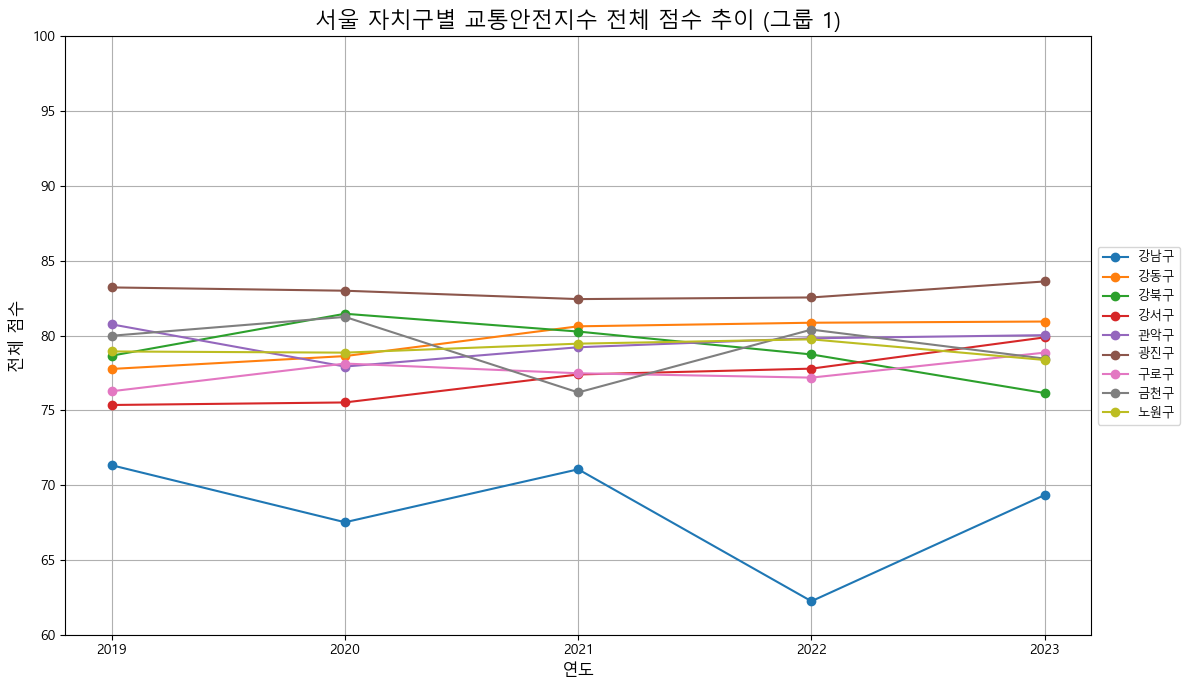

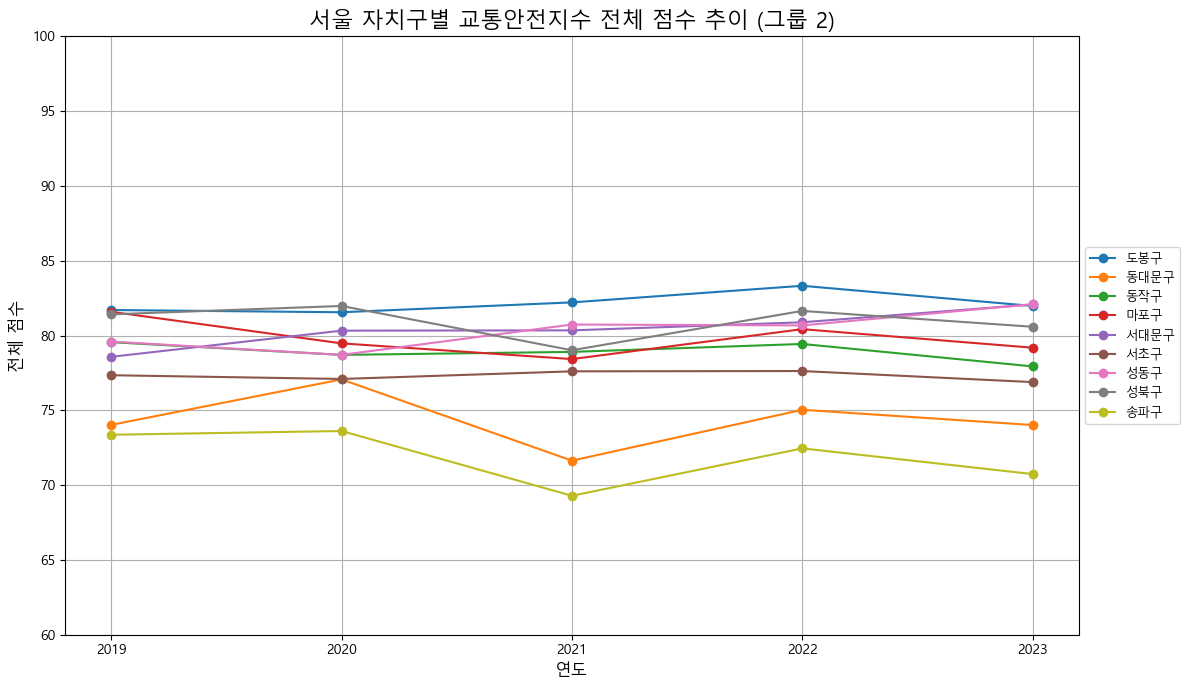

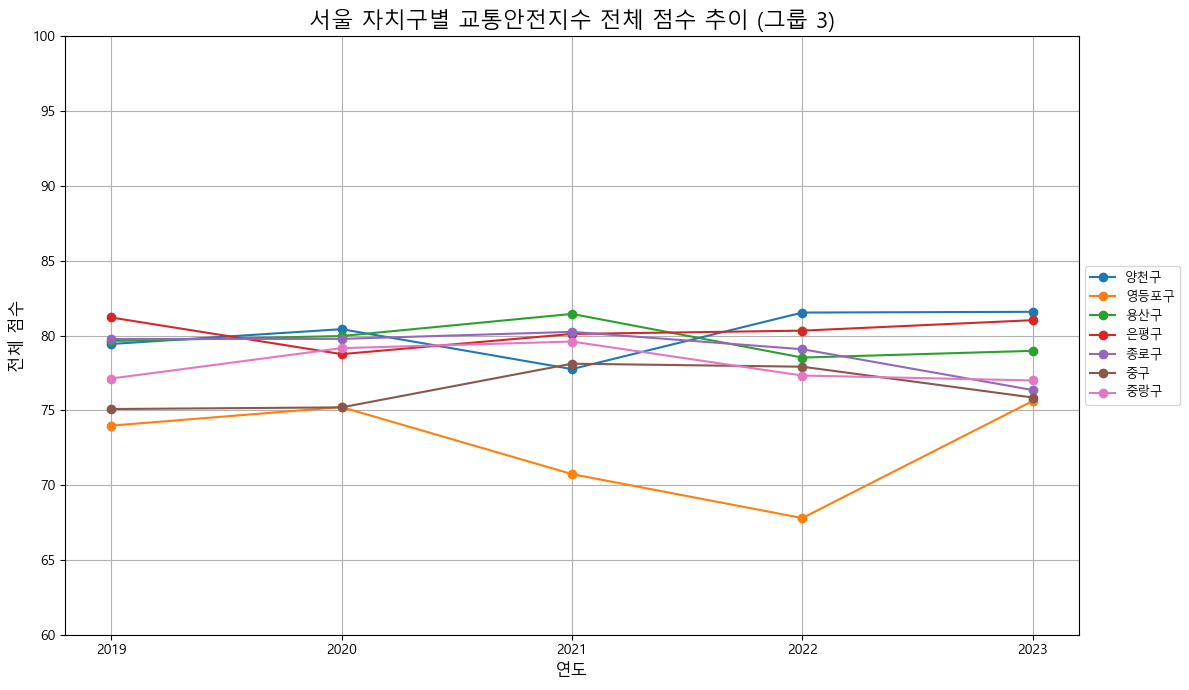

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import math

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

# 1. 데이터 불러오기
df = pd.read_excel(r"data\Traffic Safety Index\교통안전지수.xlsx", sheet_name="Sheet1", header=1)

# 2. 서울 자치구 필터링
df = df[df['시도'] == '서울']

# 3. 연도별 점수 추출
year_columns = ['2019', '2020', '2021', '2022', '2023']
df_scores = df[['시군구'] + year_columns].copy()
df_scores.set_index('시군구', inplace=True)
df_scores = df_scores.apply(pd.to_numeric, errors='coerce')

# 4. 자치구 나누기
districts = df_scores.index.tolist()
num_groups = 3
group_size = math.ceil(len(districts) / num_groups)

# 5. 시각화
for i in range(num_groups):
    subset = districts[i * group_size:(i + 1) * group_size]
    plt.figure(figsize=(12, 7))
    for gu in subset:
        y = df_scores.loc[gu].values
        if not pd.isnull(y).all():
            plt.plot(year_columns, y, marker='o', label=gu)

    plt.title(f"서울 자치구별 교통안전지수 전체 점수 추이 (그룹 {i+1})", fontsize=16)
    plt.xlabel("연도", fontsize=12)
    plt.ylabel("전체 점수", fontsize=12)
    plt.ylim(60, 100) # 축 값은 1번쨰 인자값 조절
    plt.xticks(ticks=range(len(year_columns)), labels=year_columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"서울_교통안전지수_추이_그룹{i+1}.png")
    plt.show()


In [ ]:
#대형사고

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import math

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

# ✅ 데이터 불러오기
file_path = r'data\major accident\서울시 대형교통사고.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# ✅ 전처리
df = df.drop(index=0)
df = df.rename(columns={"시군구": "자치구"})
df = df[df["자치구"] != "합계"]

columns_needed = ["자치구", "2019", "2020", "2021", "2022", "2023"]
df_acc = df[columns_needed].copy()

for year in ["2019", "2020", "2021", "2022", "2023"]:
    df_acc[year] = pd.to_numeric(df_acc[year].replace("-", 0), errors='coerce').fillna(0).astype(int)

# ✅ 자치구 목록 나누기
gu_list = df_acc["자치구"].tolist()
n = math.ceil(len(gu_list) / 3)
split_gu = [gu_list[i:i + n] for i in range(0, len(gu_list), n)]

# ✅ 3개로 나눠서 각각 시각화
for i, gu_group in enumerate(split_gu, start=1):
    df_subset = df_acc[df_acc["자치구"].isin(gu_group)]
    df_melted = pd.melt(df_subset, id_vars=["자치구"], var_name="연도", value_name="사고건수")

    plt.figure(figsize=(18, 10))
    sns.barplot(data=df_melted, x="연도", y="사고건수", hue="자치구")
    plt.title(f"[그룹 {i}] 연도별 자치구별 대형교통사고 발생건수", fontsize=16)
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.tight_layout()

    output_path = f"연도별_대형교통사고_막대그래프_그룹{i}.png"
    plt.savefig(output_path, dpi=300)
    plt.close()


C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\237353646.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_acc[year] = pd.to_numeric(df_acc[year].replace("-", 0), errors='coerce').fillna(0).astype(int)
C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\237353646.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_acc[year] = pd.to_numeric(df_acc[year].replace("-", 0), errors='coerce').fillna(0).astype(int)
C:\Users\yues7\AppData\Local\Temp\ipykernel_22564\237353646.py:30: FutureWarning: Downcasting behavior in `replace

In [ ]:
#법규 위반 교통사고고

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import platform

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

# 파일 경로
main_file = r"data\breach of the law\2019~2023 법규위반별 교통사고 현황.xlsx"
dui_file = r"data\breach of the law\2019~2023 음주운전 교통사고 현황.xlsx"

# 데이터 로드
df = pd.read_excel(main_file, sheet_name='데이터')
dui_df = pd.read_excel(dui_file, sheet_name='데이터')

# 헤더 정리
header_row = df.iloc[1]
df.columns = header_row
df = df[2:]

# 자치구 리스트
gu_list = df['자치구별(2)'].dropna().unique().tolist()
gu_list = [gu for gu in gu_list if gu != '소계']

# 연도 정의
years = ['2019', '2020', '2021', '2022', '2023']

# 음주운전 데이터 정리
new_columns = ['자치구별(1)', '자치구별(2)']
metrics = ['발생건수 (건)', '사망자수 (명)', '부상자수 (명)']
for year in years:
    for metric in metrics:
        new_columns.append(f"{year}_{metric}")
dui_df.columns = new_columns
dui_df = dui_df[1:]

# 출력 폴더 생성
output_dir = "연도별_자치구_발생건수_막대그래프"
os.makedirs(output_dir, exist_ok=True)

# 연도별 처리
for year in years:
    year_data = []
    for gu in gu_list:
        # 법규위반 발생건수 추출
        gu_rows = df[(df['자치구별(2)'] == gu) & (df['항목'] == '발생건수 (건)')]
        if gu_rows.empty:
            continue
        try:
            val = pd.to_numeric(gu_rows[year].values[0], errors='coerce')
        except:
            val = 0

        # 음주운전 발생건수 추가
        dui_rows = dui_df[dui_df['자치구별(2)'] == gu]
        try:
            dui_val = pd.to_numeric(dui_rows[f"{year}_발생건수 (건)"].values[0], errors='coerce')
        except:
            dui_val = 0

        total = (val if pd.notna(val) else 0) + (dui_val if pd.notna(dui_val) else 0)
        year_data.append((gu, total))
        # === 사망자수 그래프 생성 ===
for year in years:
    death_data = []
    for gu in gu_list:
        # 법규위반 사망자수 추출
        gu_rows = df[(df['자치구별(2)'] == gu) & (df['항목'] == '사망자수 (명)')]
        if gu_rows.empty:
            continue
        try:
            val = pd.to_numeric(gu_rows[year].values[0], errors='coerce')
        except:
            val = 0

    # 정렬
    year_data.sort(key=lambda x: x[1], reverse=True)

    # 그래프 그리기
    labels, values = zip(*year_data)
    plt.figure(figsize=(14, 8))
    plt.barh(labels, values, color='cornflowerblue')
    plt.xlabel("교통사고 발생건수 (건)")
    plt.title(f"{year}년 자치구별 전체 교통사고 발생건수 (법규위반 + 음주운전)")
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.tight_layout()

    # 저장
    plt.savefig(f"{output_dir}/{year}_자치구별_전체발생건수.png")
    plt.close()
    
    # === 사망자수 그래프 생성 ===
for year in years:
    death_data = []
    for gu in gu_list:
        gu_rows = df[(df['자치구별(2)'] == gu) & (df['항목'] == '사망자수 (명)')]
        val = pd.to_numeric(gu_rows.get(year, 0).values[0], errors='coerce') if not gu_rows.empty else 0

        dui_rows = dui_df[dui_df['자치구별(2)'] == gu]
        dui_val = pd.to_numeric(dui_rows.get(f"{year}_사망자수 (명)", 0).values[0], errors='coerce') if not dui_rows.empty else 0

        total = (val if pd.notna(val) else 0) + (dui_val if pd.notna(dui_val) else 0)
        death_data.append((gu, total))

    # ✅ 데이터가 없으면 스킵
    if not any(value > 0 for _, value in death_data):
        print(f"[스킵] {year}년 사망자수 데이터 없음")
        continue

    # 그래프 저장
    labels, values = zip(*sorted(death_data, key=lambda x: x[1], reverse=True))
    plt.figure(figsize=(14, 8))
    plt.barh(labels, values, color='indianred')
    plt.xlabel("교통사고 사망자수 (명)")
    plt.title(f"{year}년 자치구별 전체 교통사고 사망자수 (법규위반 + 음주운전)")
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{year}_자치구별_전체사망자수.png")
    plt.close()

# === 연도별 교통사고 부상자수 그래프 ===
for year in years:
    injury_data = []
    for gu in gu_list:
        gu_rows = df[(df['자치구별(2)'] == gu) & (df['항목'] == '부상자수 (명)')]
        val = pd.to_numeric(gu_rows[year].values[0], errors='coerce') if year in gu_rows.columns else 0

        dui_rows = dui_df[dui_df['자치구별(2)'] == gu]
        dui_val = pd.to_numeric(dui_rows[f"{year}_부상자수 (명)"].values[0], errors='coerce') if not dui_rows.empty else 0

        total = (val if pd.notna(val) else 0) + (dui_val if pd.notna(dui_val) else 0)
        injury_data.append((gu, total))

    if not any(value > 0 for _, value in injury_data):
        print(f"[스킵] {year}년 부상자수 데이터 없음")
        continue

    injury_data.sort(key=lambda x: x[1], reverse=True)
    labels, values = zip(*injury_data)
    plt.figure(figsize=(14, 8))
    plt.barh(labels, values, color='darkorange')
    plt.xlabel("교통사고 부상자수 (명)")
    plt.title(f"{year}년 자치구별 전체 교통사고 부상자수 (법규위반 + 음주운전)")
    plt.gca().invert_yaxis()
    plt.grid(axis='x')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{year}_자치구별_전체부상자수.png")
    plt.close()


c:\Users\yues7\data_B_project\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\yues7\data_B_project\.venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# 요일 시간대별 교통사고 현황(히트맵)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# ✅ 한글 폰트 설정 (OS별 적용)
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # Linux는 시스템에 설치 필요
plt.rcParams['axes.unicode_minus'] = False

# ✅ CSV 파일 경로 설정
file_time = r'data\hourly traffic accident\시간대별+교통사고+현황_20250516210949.csv'
file_day = r'data\hourly traffic accident\요일별+교통사고+현황_20250516205348.csv'

# ✅ 데이터 불러오기
df_time = pd.read_csv(file_time, encoding='utf-8')
df_day = pd.read_csv(file_day, encoding='utf-8')

# ✅ 시간대별 사고건수 추출 (2023년)
time_columns = [col for col in df_time.columns if col.startswith("2023.")]
time_labels = df_time.iloc[1][time_columns]
df_time_2023 = pd.DataFrame({
    "시간대": time_labels.values,
    "사고건수": df_time.iloc[2][time_columns].astype(int).values
})

# ✅ 요일별 사고건수 추출 (2023년)
day_columns = [col for col in df_day.columns if col.startswith("2023.")]
day_labels = df_day.iloc[1][day_columns]
df_day_2023 = pd.DataFrame({
    "요일": day_labels.values,
    "사고건수": df_day.iloc[2][day_columns].astype(int).values
})

# ✅ 시간대 × 요일 조합 테이블 생성 (단순 비례 추정)
cross_df = pd.merge(df_time_2023.assign(key=1), df_day_2023.assign(key=1), on='key').drop('key', axis=1)
cross_df['사고건수'] = (cross_df['사고건수_x'] * cross_df['사고건수_y']) // 10000  # 크기 조절

# ✅ 피벗 테이블 구성
pivot_cross = cross_df.pivot(index='시간대', columns='요일', values='사고건수')

# ✅ 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_cross, annot=True, fmt="d", cmap="YlGnBu")
plt.title("시간대별 × 요일별 교통사고 발생 상관 히트맵 (비례 모델)")
plt.xlabel("요일")
plt.ylabel("시간대")
plt.tight_layout()

# ✅ 이미지 저장
output_path = "히트맵_시간대별_요일별_사고_상관.png"
plt.savefig(output_path, dpi=300)
plt.close()


In [ ]:
#자치구별 사고유형형

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import platform
import os
import re

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

# 파일 경로 (수정 필요)
files = {
    "2019": r'data\By accident type\교통사고+현황(사고유형별)_2019년.csv',
    "2020": r"data\By accident type\교통사고+현황(사고유형별)_2020년.csv",
    "2021": r"data\By accident type\교통사고+현황(사고유형별)_2021년.csv",
    "2022": r"data\By accident type\교통사고+현황(사고유형별)_2022년.csv",
    "2023": r"data\By accident type\교통사고+현황(사고유형별)_2023년.csv",
}

# 사고 유형별 컬럼 매핑
col_map = {
    "차대사람": lambda y: f"{y}.1",
    "차대차": lambda y: f"{y}.2",
    "차량단독": lambda y: f"{y}.3",
}

# 분석 항목
categories = ["발생건수 (건)", "사망자수 (명)", "부상자수 (명)"]

# 자치구 목록 추출
sample_df = pd.read_csv(files["2023"], encoding="utf-8")
gu_list = sample_df["자치구별(2)"].dropna().unique()

# 결과 저장 폴더
output_dir = "자치구 사고유형 차트"
os.makedirs(output_dir, exist_ok=True)

# 색상
colors = ['orange', 'seagreen', 'deepskyblue']

# 자치구별 반복
for gu in gu_list:
    results = {t: {c: [] for c in categories} for t in col_map}

    for year, path in files.items():
        df = pd.read_csv(path, encoding="utf-8")
        filtered = df[(df["자치구별(2)"] == gu) & (df["구분별(1)"].isin(categories))]
        for t in col_map:
            col = col_map[t](year)
            for c in categories:
                try:
                    val = float(filtered[filtered["구분별(1)"] == c][col].values[0])
                except:
                    val = 0.0
                results[t][c].append(val)

    # 평균 계산
    averaged = {
        t: [np.mean(results[t][c]) for c in categories]
        for t in col_map
    }

    # 정규화 (0~1 범위)
    flat_values = [v for sublist in averaged.values() for v in sublist]
    max_val = max(flat_values) if flat_values else 1
    normalized = {
        t: [max(v / max_val, 0.05) for v in averaged[t]]
        for t in col_map
    }

    # 레이더차트 좌표 계산
    labels = categories
    num_vars = len(labels)
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for idx, (label, values) in enumerate(normalized.items()):
        values += values[:1]
        ax.plot(angles, values, label=label, color=colors[idx], marker='o')
        ax.fill(angles, values, color=colors[idx], alpha=0.3)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color="white", fontsize=12, fontweight='bold')
    ax.set_yticklabels([])  # 원형 눈금 숫자 제거
    ax.spines['polar'].set_color('white')

    plt.title(f"{gu} 사고유형별 평균지표 (2019~2023)", size=14, color="white")

    legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    for text in legend.get_texts():
        text.set_color("white")
        text.set_fontsize(10)

    plt.tight_layout()

    # 파일명 안전하게
    safe_gu = re.sub(r'[\\/*?:"<>|]', "_", gu).strip()
    filename = os.path.join(output_dir, f"{safe_gu}_사고유형_레이더차트.png")
    plt.savefig(filename, dpi=300, transparent=True)
    plt.close()


In [ ]:
#자치구별 신호등, 횡단보도

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'
    
# 파일 경로
file_path = "data\Traffic light\서울특별시_자치구별 신호등 및 횡단보도 위치 및 현황.xlsx"

# 시트 1: 횡단보도, 시트 2: 신호등
crosswalk_df = pd.read_excel(file_path, sheet_name=0)
signal_df = pd.read_excel(file_path, sheet_name=1)

# 전처리 함수 정의
def preprocess(df):
    df.columns = df.iloc[2]  # 3번째 행을 열 이름으로
    return df[3:]            # 4번째 행부터 데이터

# 데이터 정리
crosswalk_df = preprocess(crosswalk_df)
signal_df = preprocess(signal_df)

# 자치구별 개수 집계
crosswalk_counts = crosswalk_df['자치구'].value_counts().sort_values(ascending=False)
signal_counts = signal_df['자치구'].value_counts().sort_values(ascending=False)

# 횡단보도 시각화 저장
plt.figure(figsize=(12, 8))
sns.barplot(x=crosswalk_counts.values, y=crosswalk_counts.index, palette="Blues_d")
plt.title("자치구별 횡단보도 설치현황", fontsize=16)
plt.xlabel("횡단보도 수", fontsize=13)
plt.ylabel("자치구", fontsize=13)
plt.tight_layout()
plt.savefig("자치구별_횡단보도_설치현황.png")
plt.close()

# 신호등 시각화 저장
plt.figure(figsize=(12, 8))
sns.barplot(x=signal_counts.values, y=signal_counts.index, palette="Reds_d")
plt.title("자치구별 신호등 설치현황", fontsize=16)
plt.xlabel("신호등 수", fontsize=13)
plt.ylabel("자치구", fontsize=13)
plt.tight_layout()
plt.savefig("자치구별_신호등_설치현황.png")
plt.close()

print("✅ 이미지 저장 완료")


In [ ]:
#-------------------------------------------------------------

In [ ]:
# 도로결빙 다발

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # 리눅스일 경우 별도 설치 필요
plt.rcParams['axes.unicode_minus'] = False

# ✅ 데이터 불러오기
file_path = r'data\bundle of road ice\행정안전부_상습 결빙구간.csv'
df = pd.read_csv(file_path, encoding='cp949')

# ✅ 자치구 추출 및 결빙구간 수 세기
df['자치구'] = df['관리청'].str.extract(r'\((.*?)\)')  # 예: '서울특별시(강서구)' → '강서구'
gu_counts = df['자치구'].value_counts().sort_values(ascending=False)

# ✅ 막대그래프 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=gu_counts.values, y=gu_counts.index, palette="Blues_d")
plt.title("자치구별 상습 결빙구간 수", fontsize=16)
plt.xlabel("결빙구간 수")
plt.ylabel("자치구")
plt.tight_layout()

# ✅ 이미지 저장
output_path = "자치구별_상습결빙구간_막대그래프.png"
plt.savefig(output_path, dpi=300)
plt.close()


C:\Users\yues7\AppData\Local\Temp\ipykernel_13496\2693441978.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gu_counts.values, y=gu_counts.index, palette="Blues_d")


In [ ]:
#걸빙 취약 시설물물

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ✅ 파일 불러오기
file_path = r'data\vulnerable to freezing\서울시 운행제한시설물 위치정보(2018년).csv'
df = pd.read_csv(file_path, encoding='cp949')

# ✅ 자치구 추출
df['자치구'] = df['위치'].str.extract(r'^(\S+구)')

# ✅ 자치구 × 구분(시설물 종류) 조합 개수 세기
facility_counts = df.groupby(['자치구', '구분']).size().reset_index(name='개수')

# ✅ 피벗 테이블 형태로 변환 (시각화 편의)
pivot_df = facility_counts.pivot(index='자치구', columns='구분', values='개수').fillna(0)

# ✅ 막대그래프 시각화 (시설물 종류별 색상 분리)
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('자치구별 운행제한 시설물 현황', fontsize=16)
plt.xlabel('자치구')
plt.ylabel('시설물 개수')
plt.legend(title='시설물 종류')
plt.tight_layout()

# ✅ 이미지 저장
output_path = "자치구별_운행제한_시설물_현황.png"
plt.savefig(output_path, dpi=300)
plt.close()


In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# 지반침하

In [ ]:
# 2025년 지반침하 지역 

데이터 샘플 (처음 5행):
         자치구  관리번호             acc_date  \
0  서울특별시 강남구  6910  2024-08-31 오전 00:00   
1  서울특별시 강남구  1321  2024-05-01 오전 00:00   
2  서울특별시 강남구  1301  2024-01-16 오전 00:00   
3  서울특별시 강남구  1294  2023-12-08 오전 00:00   
4  서울특별시 강남구  1280  2023-09-12 오전 00:00   

                                 acc_loc acc_reason  width  length  depth  \
0                      서울특별시 강남구 역삼동 650         기타    1.5     2.0   0.06   
1            서울특별시 강남구 논현동 논현동 61-7 앞 도로     하수관 손상    0.3     0.8   1.50   
2  서울특별시 강남구 삼성동 159-8 그랜드인터컨티넨탈 호텔 앞 보도     하수관 손상    1.5     3.0   1.50   
3                   서울특별시 강남구 삼성동 111-43     상수관 손상    1.0     1.4   0.70   
4                      서울특별시 강남구 역삼동 800     상수관 손상    1.0     1.0   0.50   

  geo_feat                    recovery_method  
0      미기재                            입시복구 완료  
1      미기재  파손된 연결관 교체 후 되메우기 및 다짐하여 응급 복구 완료  
2      미기재                               복구완료  
3      미기재                              복구 완료  
4      미기재            

C:\Users\yues7\AppData\Local\Temp\ipykernel_10920\2173537915.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='자치구', order=df['자치구'].value_counts().index, palette='viridis')


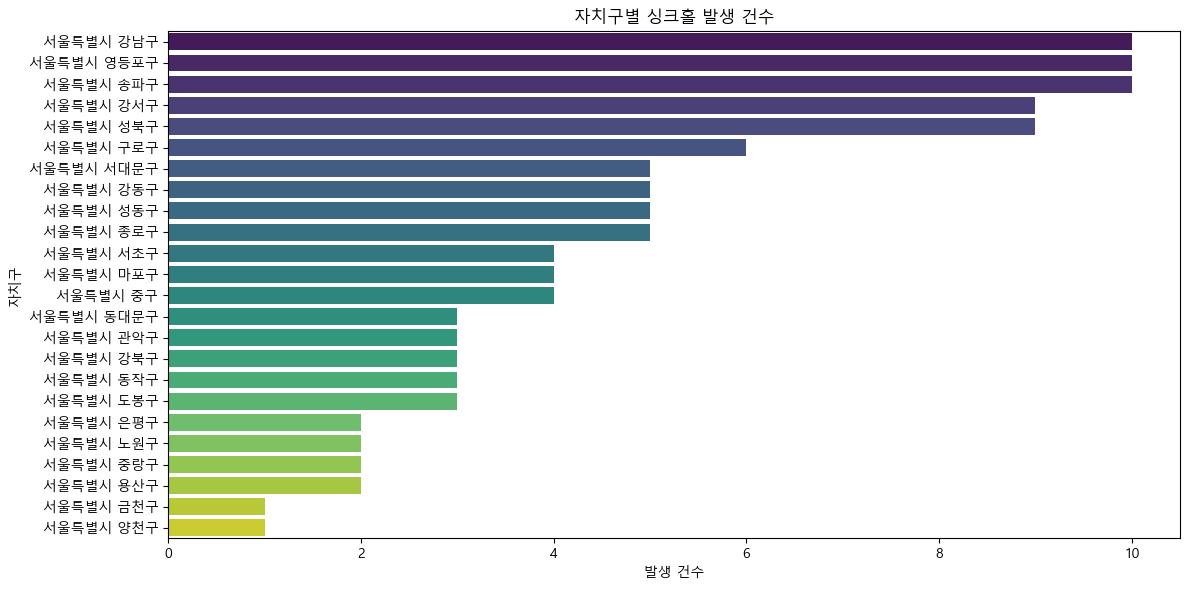

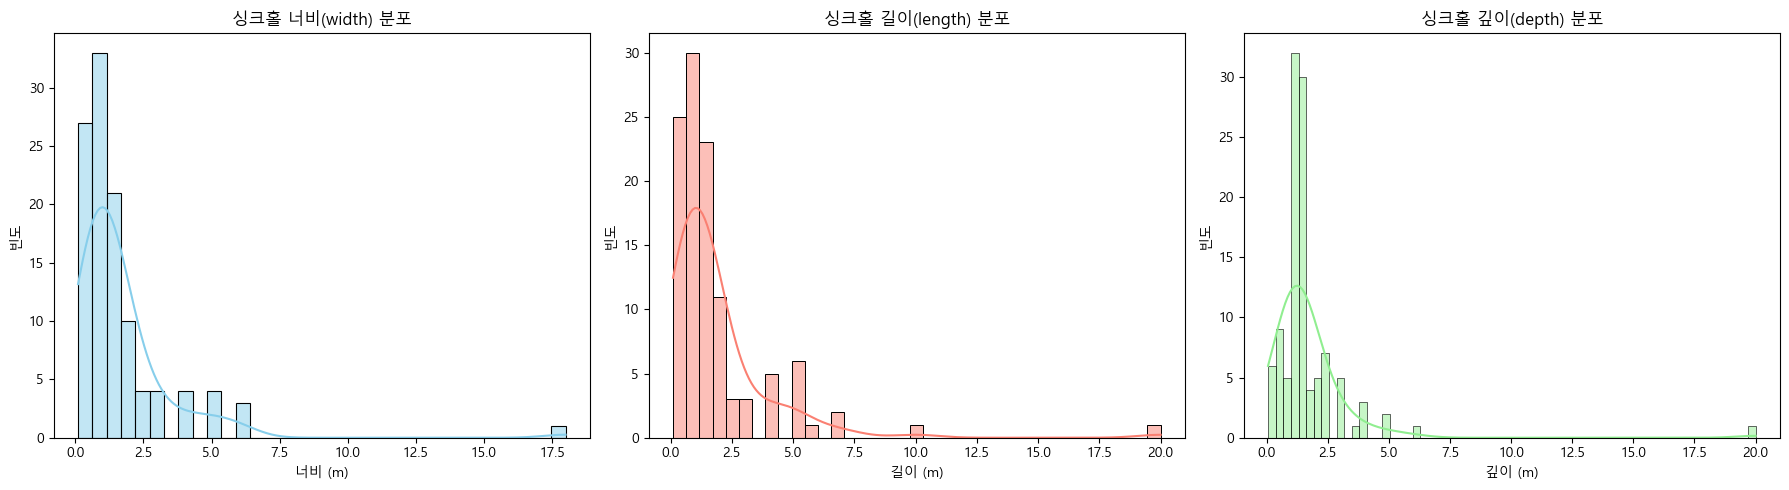

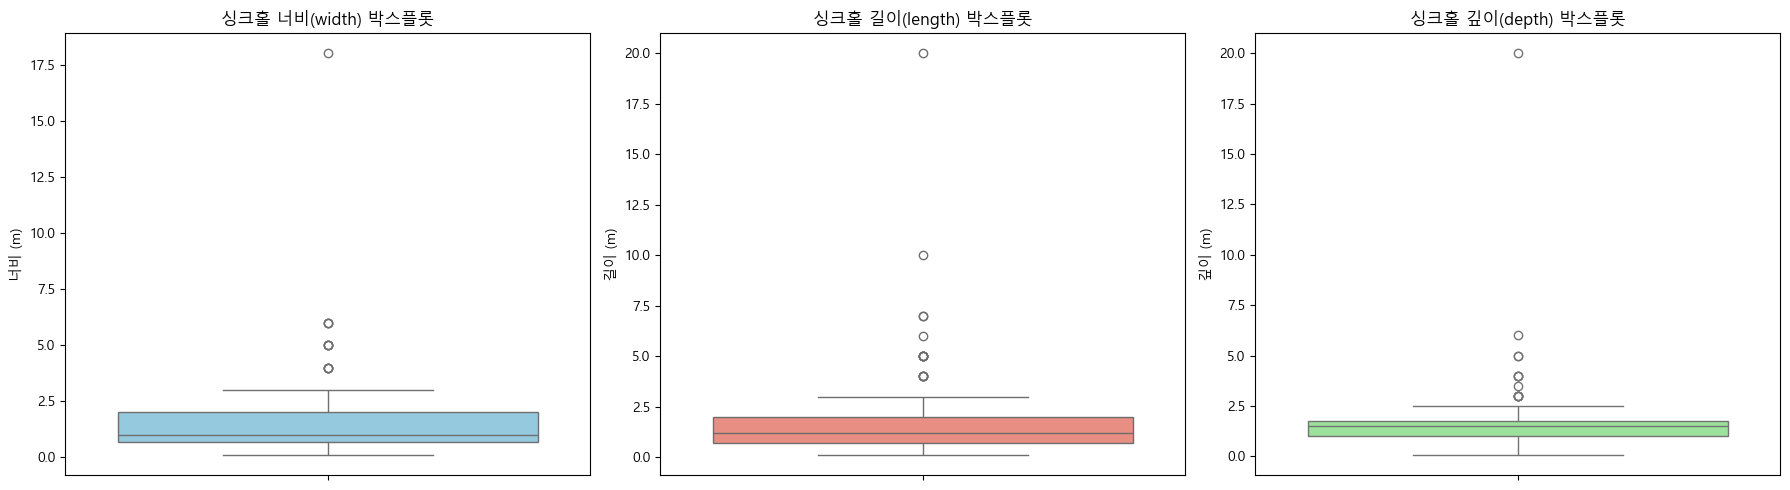

C:\Users\yues7\AppData\Local\Temp\ipykernel_10920\2173537915.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=reason_counts.index, x=reason_counts.values, palette='coolwarm')


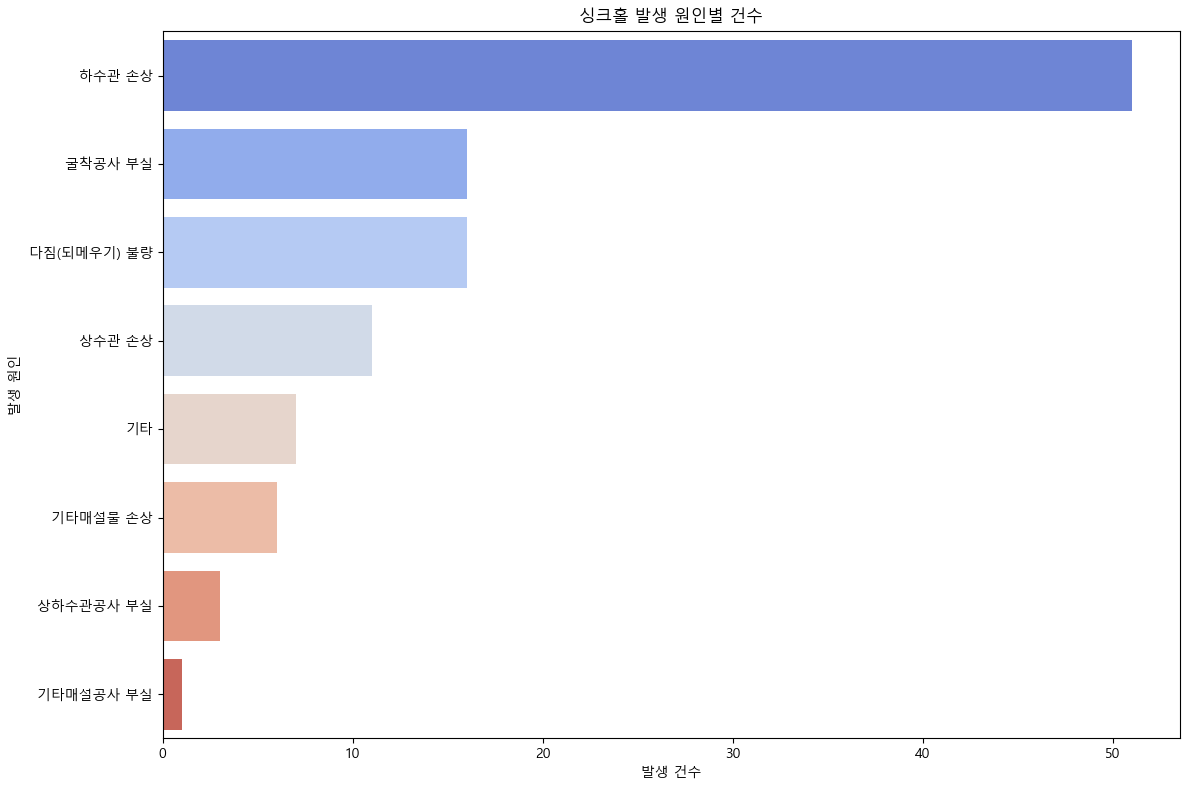

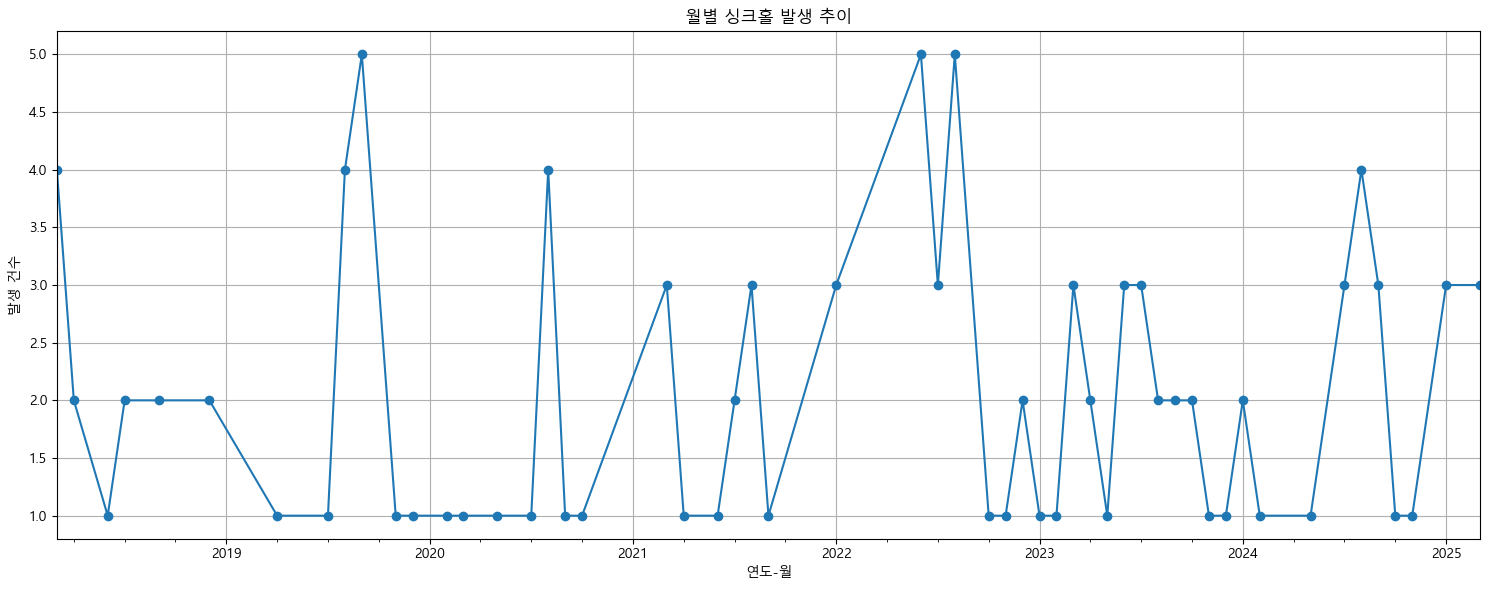

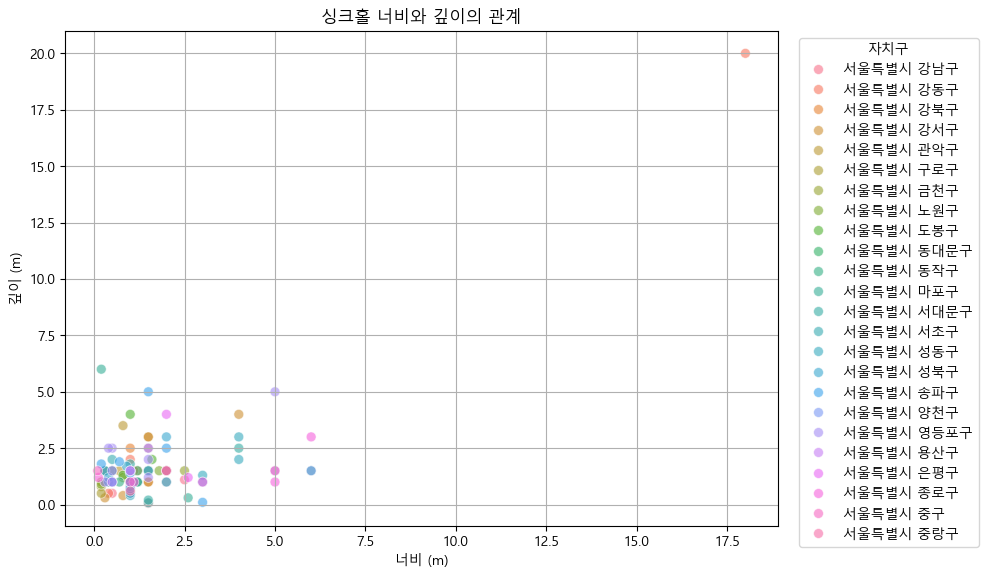


시각화 코드 실행 완료. 필요한 경우 코드를 수정하여 더 다양한 분석을 수행할 수 있습니다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정을 위한 함수 (Windows, Mac, Linux 환경에 따라 적절한 폰트 선택 필요)
def get_korean_font():
    # 시스템에 설치된 한글 폰트 목록을 확인하고 적절한 폰트 이름을 반환
    # 예시: 'Malgun Gothic' (Windows), 'AppleGothic' (Mac)
    # 사용자의 환경에 맞게 폰트 이름을 수정해야 할 수 있습니다.
    # 사용 가능한 폰트 목록 확인:
    # print([f.name for f in fm.fontManager.ttflist if 'Gothic' in f.name or 'Nanum' in f.name])
    
    # 아래는 일반적인 한글 폰트 이름입니다. 사용자의 시스템에 설치된 폰트로 변경해주세요.
    font_name = 'Malgun Gothic' # Windows
    # font_name = 'AppleGothic' # macOS
    # font_name = 'NanumGothic' # Linux (나눔고딕 설치 필요)
    
    if font_name in [f.name for f in fm.fontManager.ttflist]:
        return font_name
    else:
        # 대체 폰트 또는 경고 메시지
        print(f"'{font_name}' 폰트를 찾을 수 없습니다. 시스템에 설치된 다른 한글 폰트를 사용하거나 설치해주세요.")
        # 기본 폰트 반환 (한글이 깨질 수 있음)
        try:
            # 다른 흔한 한글 폰트 시도
            for f_name in ['NanumGothic', 'AppleGothic', 'Gulim', 'Dotum']:
                if f_name in [f.name for f in fm.fontManager.ttflist]:
                    print(f"대신 '{f_name}' 폰트를 사용합니다.")
                    return f_name
            return fm.FontProperties(family='sans-serif').get_name() # 최후의 수단
        except:
            return fm.FontProperties(family='sans-serif').get_name()


# 한글 폰트 설정
font_name = get_korean_font()
plt.rcParams['font.family'] = font_name
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 경로 (사용자께서 제공해주신 경로)
file_path = r"C:\Users\yues7\data_B_project\data\sinkhole_seoul_data_all_pages.csv"

# CSV 파일 불러오기
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다: {file_path}")
    exit()
except Exception as e:
    print(f"파일을 불러오는 중 오류 발생: {e}")
    exit()

# 데이터 앞부분 확인
print("데이터 샘플 (처음 5행):")
print(df.head())
print("\n데이터 정보:")
df.info()

# 1. 자치구별 싱크홀 발생 건수 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='자치구', order=df['자치구'].value_counts().index, palette='viridis')
plt.title('자치구별 싱크홀 발생 건수')
plt.xlabel('발생 건수')
plt.ylabel('자치구')
plt.tight_layout() # 그래프가 잘리지 않도록 레이아웃 조정
plt.show()

# 2. 싱크홀 규모 (width, length, depth) 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['width'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('싱크홀 너비(width) 분포')
axes[0].set_xlabel('너비 (m)')
axes[0].set_ylabel('빈도')

sns.histplot(df['length'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('싱크홀 길이(length) 분포')
axes[1].set_xlabel('길이 (m)')
axes[1].set_ylabel('빈도')

sns.histplot(df['depth'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('싱크홀 깊이(depth) 분포')
axes[2].set_xlabel('깊이 (m)')
axes[2].set_ylabel('빈도')

plt.tight_layout()
plt.show()

# 박스플롯으로도 규모 분포 확인
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df, y='width', ax=axes[0], color='skyblue')
axes[0].set_title('싱크홀 너비(width) 박스플롯')
axes[0].set_ylabel('너비 (m)')

sns.boxplot(data=df, y='length', ax=axes[1], color='salmon')
axes[1].set_title('싱크홀 길이(length) 박스플롯')
axes[1].set_ylabel('길이 (m)')

sns.boxplot(data=df, y='depth', ax=axes[2], color='lightgreen')
axes[2].set_title('싱크홀 깊이(depth) 박스플롯')
axes[2].set_ylabel('깊이 (m)')

plt.tight_layout()
plt.show()


# 3. 발생 원인(acc_reason)별 싱크홀 발생 건수 시각화
# 'acc_reason' 컬럼이 있는지 확인 후 진행
if 'acc_reason' in df.columns:
    plt.figure(figsize=(12, 8)) # 그래프 크기 조절
    # 원인별 빈도수 계산 및 상위 N개 또는 전체 표시 (데이터에 따라 조절)
    reason_counts = df['acc_reason'].value_counts()
    sns.barplot(y=reason_counts.index, x=reason_counts.values, palette='coolwarm')
    plt.title('싱크홀 발생 원인별 건수')
    plt.xlabel('발생 건수')
    plt.ylabel('발생 원인')
    plt.tight_layout()
    plt.show()
else:
    print("\n'acc_reason' 컬럼이 데이터에 존재하지 않습니다.")

# 4. 발생 일자(acc_date)를 사용한 시계열 분석 (선택 사항)
# 'acc_date' 컬럼이 있고, 날짜 형식으로 변환 가능한 경우
if 'acc_date' in df.columns:
    try:
        # 현재 이미지의 "2024-08-31 오전 08:00" 에서 날짜만 추출하는 경우
        df['acc_date_only'] = pd.to_datetime(df['acc_date'].str.split(' ').str[0], errors='coerce')
        
        if not df['acc_date_only'].isnull().all(): # 변환된 날짜 데이터가 있다면
            df['year_month'] = df['acc_date_only'].dt.to_period('M')
            monthly_counts = df.groupby('year_month').size()
            
            plt.figure(figsize=(15, 6))
            monthly_counts.plot(kind='line', marker='o')
            plt.title('월별 싱크홀 발생 추이')
            plt.xlabel('연도-월')
            plt.ylabel('발생 건수')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print("\n'acc_date' 컬럼을 날짜 형식으로 변환하는 데 실패했거나 모든 값이 비어있습니다.")

    except Exception as e:
        print(f"\n날짜 데이터 처리 중 오류 발생: {e}")
else:
    print("\n'acc_date' 컬럼이 데이터에 존재하지 않습니다.")

# 5. 너비와 깊이의 관계 (Scatter Plot)
if 'width' in df.columns and 'depth' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='width', y='depth', hue='자치구', alpha=0.6, s=50) # s는 점 크기
    plt.title('싱크홀 너비와 깊이의 관계')
    plt.xlabel('너비 (m)')
    plt.ylabel('깊이 (m)')
    plt.legend(title='자치구', bbox_to_anchor=(1.02, 1), loc='upper left') # 범례 위치 조정
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n'width' 또는 'depth' 컬럼이 데이터에 존재하지 않습니다.")

print("\n시각화 코드 실행 완료. 필요한 경우 코드를 수정하여 더 다양한 분석을 수행할 수 있습니다.")

In [ ]:
#도로 굴착 정보보

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.font_manager as fm
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
import time # 지오코딩 시 요청 간 딜레이를 위함
import math # 페이지 계산을 위해

# --- 한글 폰트 설정 함수 ---
def get_korean_font():
    font_name = 'Malgun Gothic' # Windows
    # font_name = 'AppleGothic' # macOS
    # font_name = 'NanumGothic' # Linux (나눔고딕 설치 필요)
    if font_name in [f.name for f in fm.fontManager.ttflist]:
        return font_name
    else:
        print(f"'{font_name}' 폰트를 찾을 수 없습니다. 시스템에 설치된 다른 한글 폰트를 사용하거나 설치해주세요.")
        try:
            for f_name in ['NanumGothic', 'AppleGothic', 'Gulim', 'Dotum']:
                if f_name in [f.name for f in fm.fontManager.ttflist]:
                    print(f"대신 '{f_name}' 폰트를 사용합니다.")
                    return f_name
            return fm.FontProperties(family='sans-serif').get_name() # 시스템 기본 sans-serif 폰트
        except:
            return fm.FontProperties(family='sans-serif').get_name()

font_name = get_korean_font()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
# --- 한글 폰트 설정 완료 ---

# 1. API 정보 설정
API_KEY = "6874616d6e686d793130394768545675" # 실제 사용 시 본인의 키로 변경하세요.
SERVICE_NAME = "ListRoadExcavationService"
ITEMS_PER_PAGE = 1000 # API가 한 번에 반환하는 최대 아이템 수 (보통 1000)

print("### 서울시 도로굴착공사 정보 전체 데이터 수집 및 분석 ###")
print(f"주의: 전체 데이터를 수집하고 지오코딩하는 작업은 데이터 양에 따라 매우 오랜 시간이 소요될 수 있습니다.")
user_confirmation = input("계속 진행하시겠습니까? (y/n): ")
if user_confirmation.lower() != 'y':
    print("작업을 취소합니다.")
    exit()

# 2. 전체 데이터 가져오기를 위한 페이지네이션 함수
def fetch_all_data(api_key, service_name, items_per_page):
    all_data_rows = []
    start_index = 1
    page_num = 1

    while True:
        end_index = start_index + items_per_page - 1
        url = f"http://openAPI.seoul.go.kr:8088/{api_key}/xml/{service_name}/{start_index}/{end_index}/"
        print(f"\n페이지 {page_num}: 데이터 요청 중... ({start_index}~{end_index}) URL: {url}")

        try:
            response = requests.get(url, timeout=60) # 타임아웃 시간 증가
            response.raise_for_status()
        except requests.exceptions.Timeout:
            print(f"  페이지 {page_num} 요청 시간 초과. 다음 페이지 시도 또는 재시도 필요.")
            # 필요시 재시도 로직 추가 가능
            break # 또는 continue로 다음 페이지 시도
        except requests.exceptions.HTTPError as err:
            print(f"  페이지 {page_num} HTTP 오류: {err}. 다음 페이지 시도 또는 재시도 필요.")
            break
        except requests.exceptions.RequestException as e:
            print(f"  페이지 {page_num} API 요청 중 오류 발생: {e}. 프로그램 종료.")
            return None # 심각한 오류로 간주하고 None 반환

        try:
            root = ET.fromstring(response.content)
        except ET.ParseError as e:
            print(f"  페이지 {page_num} XML 파싱 오류: {e}")
            break

        result_code_element = root.find('./RESULT/CODE')
        if result_code_element is None or result_code_element.text != 'INFO-000':
            error_message = root.findtext('./RESULT/MESSAGE', "알 수 없는 오류")
            print(f"  페이지 {page_num} API 호출 실패 또는 데이터 없음: {error_message}")
            if "INFO-200" in result_code_element.text: # 데이터 없음 코드
                 print("  더 이상 데이터가 없습니다.")
            break # API 오류 시 루프 종료

        # 첫 페이지에서만 총 데이터 건수 확인
        if page_num == 1:
            total_count_element = root.find('list_total_count')
            if total_count_element is not None and total_count_element.text.isdigit():
                total_count = int(total_count_element.text)
                print(f"총 데이터 건수 (API 응답): {total_count}")
                if total_count == 0:
                    print("조회된 데이터가 없습니다.")
                    return [] # 빈 리스트 반환
            else:
                print("총 데이터 건수를 찾을 수 없거나 유효하지 않습니다. 첫 페이지만 처리합니다.")
                total_count = items_per_page # 임시로 현재 페이지 아이템 수로 설정하여 루프 한 번만 돌도록

        current_page_rows = []
        for row_idx_rel, row_xml in enumerate(root.findall('.//row')):
            # SEQ는 전체 데이터 기준으로 다시 매겨야 하므로 여기서는 상대 인덱스 사용
            seq_overall = start_index + row_idx_rel # 전체 데이터 내에서의 순번 (참고용)

            ssg_nm = row_xml.findtext('SSG_NM')
            stty_emd_nm = row_xml.findtext('STTY_EMD_NM')
            cstrn_nm = row_xml.findtext('CSTRN_NM')
            excv_loca = row_xml.findtext('EXCV_LOCA')
            road_nm = row_xml.findtext('ROAD_NM')

            address_for_geocoding = None
            if excv_loca:
                address_for_geocoding = excv_loca
            elif road_nm and ssg_nm and stty_emd_nm:
                address_for_geocoding = f"서울특별시 {ssg_nm} {stty_emd_nm} {road_nm}"
            elif ssg_nm and stty_emd_nm:
                address_for_geocoding = f"서울특별시 {ssg_nm} {stty_emd_nm}"
            elif ssg_nm and road_nm:
                address_for_geocoding = f"서울특별시 {ssg_nm} {road_nm}"
            elif ssg_nm:
                address_for_geocoding = f"서울특별시 {ssg_nm}"

            if address_for_geocoding:
                current_page_rows.append({
                    # 'SEQ_OVERALL': seq_overall, # 필요시 사용
                    '자치구': ssg_nm,
                    '법정동': stty_emd_nm,
                    '공사명': cstrn_nm,
                    '굴착위치': excv_loca,
                    '도로명': road_nm,
                    '주소_지오코딩용': address_for_geocoding
                })
        
        if not current_page_rows:
            print(f"  페이지 {page_num}에서 추출된 데이터가 없습니다.")
            break # 현재 페이지에 데이터가 없으면 종료

        all_data_rows.extend(current_page_rows)
        print(f"  페이지 {page_num}에서 {len(current_page_rows)}건 추출 완료. 현재까지 총 {len(all_data_rows)}건.")

        # 다음 페이지 설정 또는 종료 조건
        if page_num == 1 and 'total_count' not in locals(): # total_count를 못가져온 경우
             if len(current_page_rows) < items_per_page: # 현재 페이지 아이템이 요청보다 적으면 마지막 페이지로 간주
                break
        elif len(all_data_rows) >= total_count: # 모든 데이터를 가져왔으면 종료
            break
        
        start_index += items_per_page
        page_num += 1
        time.sleep(1) # API 서버 부하 감소를 위한 짧은 대기

    return all_data_rows

# 3. 전체 데이터 가져오기 실행
all_data_rows = fetch_all_data(API_KEY, SERVICE_NAME, ITEMS_PER_PAGE)

if all_data_rows is None: # 심각한 API 오류
    print("데이터 수집 중 심각한 오류가 발생하여 프로그램을 종료합니다.")
    exit()
elif not all_data_rows:
    print("최종적으로 수집된 데이터가 없습니다.")
    exit()

print(f"\n총 {len(all_data_rows)}건의 데이터 수집 완료.")

# DataFrame 생성 시 SEQ 컬럼 추가 (0부터 시작하는 인덱스)
df = pd.DataFrame(all_data_rows)
df.reset_index(inplace=True) # 기본 정수 인덱스를 사용
df.rename(columns={'index': 'SEQ'}, inplace=True) # 인덱스 컬럼명을 SEQ로 변경

print(f"\n추출된 전체 데이터 (처음 5건):")
print(df.head())
print(f"\n추출된 전체 데이터 (마지막 5건):")
print(df.tail())


# 4. 지오코딩 (주소를 위도/경도 좌표로 변환)
geolocator = Nominatim(user_agent="seoul_road_excavation_mapper_yues7_v2_full_data") # User-Agent 업데이트

df['latitude'] = None
df['longitude'] = None
geocode_cache = {} # 지오코딩 결과를 캐싱하여 중복 요청 방지

print("\n지오코딩을 시작합니다... (데이터 양에 따라 매우 오래 걸릴 수 있습니다. Nominatim 사용 정책을 준수해주세요.)")

# --- 지오코딩 실행 반복문 ---
MAX_RETRIES = 3
RETRY_DELAY = 5 # 초 (초당 1회 이상 요청 시 차단될 수 있으므로 주의)

geocoded_count = 0
failed_count = 0

for index, row in df.iterrows():
    address = row['주소_지오코딩용']
    if pd.isna(address) or not address.strip(): # 주소가 비어있거나 NaN인 경우 스킵
        print(f"  {index+1}/{len(df)} (SEQ: {row['SEQ']}): 주소 없음, 건너뜁니다.")
        failed_count +=1
        continue

    # 진행 상황 표시 (예: 매 100건마다)
    if (index + 1) % 50 == 0:
        print(f"  진행状況: {index+1}/{len(df)} 처리 중... (성공: {geocoded_count}, 실패/건너뜀: {failed_count})")


    if address in geocode_cache: # 캐시 확인
        location = geocode_cache[address]
        if location and hasattr(location, 'latitude') and hasattr(location, 'longitude'):
            # print(f"    -> 캐시된 결과 사용: ({location.latitude}, {location.longitude})")
            df.loc[index, 'latitude'] = location.latitude
            df.loc[index, 'longitude'] = location.longitude
            geocoded_count +=1
        # else:
            # print(f"    -> 캐시된 결과 없음 (이전에 실패 또는 유효하지 않은 location 객체)")
            # failed_count +=1 # 캐시된 실패도 실패로 카운트 (이미 처리됨)
        time.sleep(0.1) # 캐시 사용 시에도 약간의 딜레이
        continue

    for attempt in range(MAX_RETRIES):
        try:
            # print(f"  {index+1}/{len(df)} (SEQ: {row['SEQ']}): \"{address}\" 지오코딩 시도 중... (시도 {attempt+1})")
            location = geolocator.geocode(address, timeout=20) # 각 요청에 타임아웃 설정
            time.sleep(1.1) # Nominatim 정책: 초당 1회 요청 제한 엄수
            
            if location:
                df.loc[index, 'latitude'] = location.latitude
                df.loc[index, 'longitude'] = location.longitude
                geocode_cache[address] = location # 성공 시 캐시에 저장
                # print(f"    -> 성공: ({location.latitude}, {location.longitude})")
                geocoded_count +=1
            else:
                geocode_cache[address] = None # 실패 시 None으로 캐시에 저장
                # print(f"    -> 주소를 찾을 수 없음.")
                if attempt == MAX_RETRIES -1: # 마지막 시도에도 실패하면
                    failed_count +=1
            break # 성공 또는 주소 찾을 수 없음 시 재시도 루프 탈출
        except GeocoderTimedOut:
            # print(f"    -> 타임아웃 (시도 {attempt+1}/{MAX_RETRIES}). {RETRY_DELAY * (attempt + 1)}초 후 재시도...")
            time.sleep(RETRY_DELAY * (attempt + 1)) # 재시도 간격 증가
            if attempt == MAX_RETRIES -1: failed_count +=1
        except GeocoderUnavailable:
            # print(f"    -> 지오코딩 서비스 사용 불가 (시도 {attempt+1}/{MAX_RETRIES}). {RETRY_DELAY * (attempt + 1)}초 후 재시도...")
            time.sleep(RETRY_DELAY * (attempt + 1))
            if attempt == MAX_RETRIES -1: failed_count +=1
        except Exception as e:
            # print(f"    -> 알 수 없는 지오코딩 오류 발생: {e}")
            geocode_cache[address] = None # 알 수 없는 오류도 실패로 간주하고 캐시
            if attempt == MAX_RETRIES -1: failed_count +=1
            break # 알 수 없는 오류 시 재시도 루프 탈출
    else: # MAX_RETRIES 모두 실패한 경우
        # print(f"    -> 지오코딩 최종 실패: \"{address}\"")
        geocode_cache[address] = None # 최종 실패도 캐시에 저장
        # failed_count는 이미 위에서 처리됨

print("\n지오코딩 완료.")
print(df[['SEQ', '주소_지오코딩용', 'latitude', 'longitude']].head())

# 5. 지오코딩 결과 요약
total_rows = len(df)
# geocoded_success_count = df['latitude'].notna().sum() # 정확한 성공 카운트는 geocoded_count 사용
print(f"\n--- 지오코딩 결과 요약 ---")
print(f"총 데이터 건수: {total_rows}")
print(f"지오코딩 성공 건수: {geocoded_count}")
print(f"지오코딩 실패/주소없음 건수: {total_rows - geocoded_count}") # df에서 직접 계산
if total_rows > 0:
    success_rate = (geocoded_count / total_rows) * 100
    print(f"지오코딩 성공률: {success_rate:.2f}%")

# 6. 데이터 분석 및 시각화 (예시: 자치구별 공사 건수)
if not df.empty and '자치구' in df.columns:
    print("\n--- 자치구별 공사 현황 ---")
    district_counts = df['자치구'].value_counts()
    print(district_counts)

    if not district_counts.empty:
        plt.figure(figsize=(18, 10)) # 전체 데이터를 다루므로 차트 크기 조정
        sns.barplot(x=district_counts.index, y=district_counts.values, palette="viridis")
        plt.title('서울시 자치구별 도로 공사 건수 (전체 데이터)', fontsize=18)
        plt.xlabel('자치구', fontsize=14)
        plt.ylabel('공사 건수', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.yticks(fontsize=10)
        plt.tight_layout()
        
        # 파일로 저장 (옵션)
        # plot_filename_district = "seoul_excavation_by_district_all.png"
        # plt.savefig(plot_filename_district)
        # print(f"자치구별 공사 현황 차트가 '{plot_filename_district}'로 저장되었습니다.")
        plt.show()
    else:
        print("자치구별 공사 건수 데이터가 없어 시각화를 건너뜁니다.")

    # 법정동별 공사 건수 (상위 N개)
    if '법정동' in df.columns:
        print("\n--- 법정동별 공사 현황 (상위 20개) ---")
        # 자치구와 법정동을 합쳐서 고유한 지역 이름 생성 (예: "강남구 역삼동")
        # NaN 값을 빈 문자열로 처리하여 오류 방지
        df['지역명'] = df['자치구'].fillna('') + " " + df['법정동'].fillna('')
        df['지역명'] = df['지역명'].str.strip() # 양쪽 공백 제거
        
        # 위경도 정보가 있는 (지오코딩 성공한) 데이터만 필터링하여 분석의 정확도 향상
        df_geocoded_success = df.dropna(subset=['latitude', 'longitude'])

        if not df_geocoded_success.empty:
            # '지역명'이 공백인 경우 제외
            location_counts = df_geocoded_success[df_geocoded_success['지역명'] != '']['지역명'].value_counts().nlargest(20)
            print(location_counts)

            if not location_counts.empty:
                plt.figure(figsize=(18, 10))
                sns.barplot(x=location_counts.index, y=location_counts.values, palette="mako")
                plt.title('공사 빈도 상위 20개 지역 (지오코딩 성공 건 기반, 전체 데이터)', fontsize=18)
                plt.xlabel('지역 (자치구 법정동)', fontsize=14)
                plt.ylabel('공사 건수', fontsize=14)
                plt.xticks(rotation=60, ha='right', fontsize=10) # 글자가 길 수 있으므로 회전 각도 조정
                plt.yticks(fontsize=10)
                plt.tight_layout()
                # plot_filename_location = "seoul_excavation_by_location_top20_all.png"
                # plt.savefig(plot_filename_location)
                # print(f"법정동별 공사 현황 차트가 '{plot_filename_location}'로 저장되었습니다.")
                plt.show()
            else:
                print("법정동별 공사 건수 데이터가 없어 시각화를 건너뜁니다. (상위 20개 기준)")
        else:
            print("지오코딩에 성공한 데이터가 없어 법정동별 공사 현황 분석을 건너뜁니다.")
else:
    print("DataFrame이 비어있거나 '자치구' 컬럼이 없어 분석을 건너뜁니다.")

# 데이터프레임을 CSV 파일로 저장 (옵션)
# try:
#     csv_filename = "seoul_road_excavation_all_data_geocoded.csv"
#     df.to_csv(csv_filename, index=False, encoding='utf-8-sig')
#     print(f"\n전체 데이터가 '{csv_filename}' 파일로 저장되었습니다.")
# except Exception as e:
#     print(f"\nCSV 파일 저장 중 오류 발생: {e}")


print("\n스크립트 실행 완료.")

In [ ]:
#서울시 지하 시설 

### CSV 파일 기반 지하수관측정 정보 시각화 ###

CSV 파일에서 데이터를 로드합니다: C:\Users\yues7\data_B_project\data\서울시 지하수시설 통계 정보.csv

컬럼명 매핑 적용 후 컬럼 목록 (일부):
Index(['허가신고번호', '시설유형', '관할기관', '개발위치지역코드', '개발위치산', '개발위치번지', '개발위치호', '경도도',
       '경도분', '경도초', '위도도', '위도분', '위도초', '기준년도', '자치구명'],
      dtype='object')

총 29104건의 데이터 수집 완료 (CSV).
데이터 샘플 (처음 5건) - 매핑 후:
       허가신고번호  시설유형       관할기관      개발위치지역코드  개발위치산  개발위치번지 개발위치호  경도도  경도분  \
0  2190100058  신고시설  서울특별시 강남구  1.168010e+09    NaN  831-21   NaN    0    0   
1  1190100023  허가시설  서울특별시 양천구           NaN    NaN     NaN   NaN    0    0   
2  2190100791  신고시설  서울특별시 양천구           NaN    NaN     NaN   NaN    0    0   
3  1199400028  허가시설  서울특별시 강서구  1.150011e+09    NaN   268-2   NaN    0    0   
4  2190100166  신고시설  서울특별시 강서구  1.150011e+09    1.0     168    12  126   49   

   경도초  위도도  위도분   위도초  기준년도 자치구명  
0  0.0    0    0   0.0  2011  강남구  
1  0.0    0    0   0.0  96-0  양천구  
2  0.0    0    0   0.0  85-0  양천구  
3  0.0    0    0   0.0  2018  강서구  

C:\Users\yues7\AppData\Local\Temp\ipykernel_31912\3691527899.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="muted") # 색상 팔레트 변경


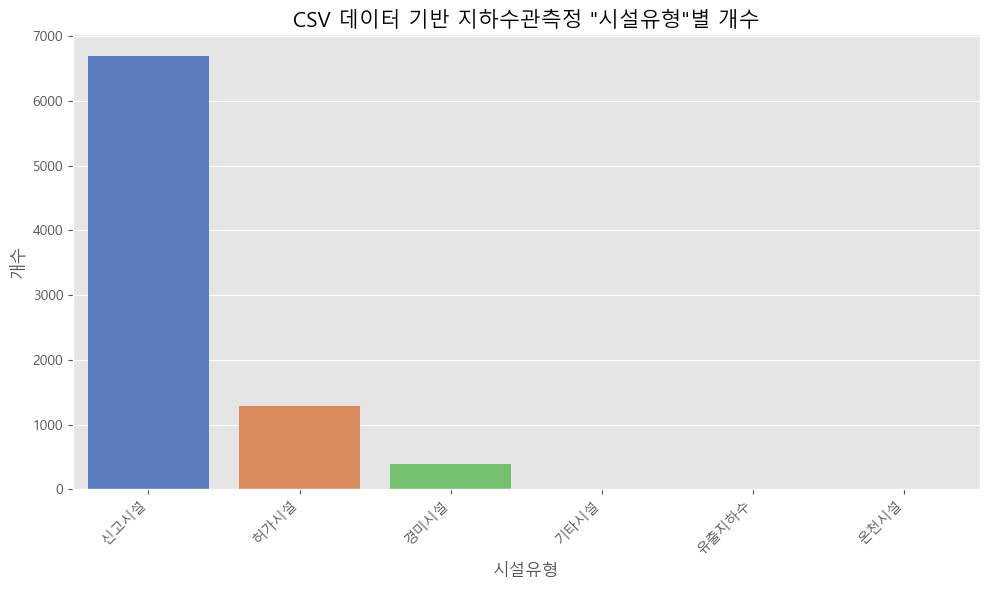


스크립트 실행 완료.


In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np

# (한글 폰트 설정 함수는 이전과 동일)
def get_korean_font():
    font_name = 'Malgun Gothic'
    if font_name in [f.name for f in fm.fontManager.ttflist]:
        return font_name
    else:
        print(f"'{font_name}' 폰트를 찾을 수 없습니다. 시스템에 설치된 다른 한글 폰트를 사용하거나 설치해주세요.")
        for f_name_candidate in ['NanumGothic', 'AppleGothic', 'Gulim', 'Dotum', '돋움', '맑은 고딕']:
            if f_name_candidate in [f.name for f in fm.fontManager.ttflist]:
                print(f"대신 '{f_name_candidate}' 폰트를 사용합니다.")
                return f_name_candidate
        print("적절한 한글 폰트를 찾지 못했습니다. 기본 sans-serif 폰트를 사용합니다 (한글이 깨질 수 있음).")
        return fm.FontProperties(family='sans-serif').get_name()

font_name = get_korean_font()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

print(f"### CSV 파일 기반 지하수관측정 정보 시각화 ###")
csv_file_path = r"C:\Users\yues7\data_B_project\data\서울시 지하수시설 통계 정보.csv"

# 컬럼 매핑 (필요시 CSV의 컬럼명을 코드에서 사용할 이름으로 변경)
# 예: '허가신고양식': '시설유형_코드내부용'
column_mapping = {
    '허가신고양식': '시설유형', # '허가신고양식'을 코드 내에서 '시설유형'으로 사용
    '팀명': '관할기관',     # 예시
    '구명': '자치구명'      # 예시
    # 필요한 다른 컬럼들도 여기에 추가
}

df = pd.DataFrame()
try:
    print(f"\nCSV 파일에서 데이터를 로드합니다: {csv_file_path}")
    df = pd.read_csv(csv_file_path, encoding='cp949')

    if column_mapping: # column_mapping이 비어있지 않으면 실행
        df.rename(columns=column_mapping, inplace=True)
        print("\n컬럼명 매핑 적용 후 컬럼 목록 (일부):")
        print(df.columns[:20]) # 더 많은 컬럼명 확인

except FileNotFoundError:
    print(f"오류: CSV 파일을 찾을 수 없습니다. 경로를 확인해주세요: {csv_file_path}")
    exit()
except UnicodeDecodeError as ude:
    print(f"CSV 파일 로드 중 인코딩 오류 발생: {ude}")
    try:
        print("euc-kr 인코딩으로 다시 시도합니다...")
        df = pd.read_csv(csv_file_path, encoding='euc-kr')
        if column_mapping: df.rename(columns=column_mapping, inplace=True)
    except Exception as e_retry:
        print(f"euc-kr 인코딩 시도 실패: {e_retry}")
        exit()
except Exception as e:
    print(f"CSV 파일 로드 중 그 외 오류 발생: {e}")
    exit()

if df.empty:
    print("CSV 파일에서 데이터를 로드했으나 DataFrame이 비어있습니다.")
    exit()

print(f"\n총 {len(df)}건의 데이터 수집 완료 (CSV).")
print("데이터 샘플 (처음 5건) - 매핑 후:")
print(df.head())

# --- 데이터 전처리 ---
def dms_to_dd(degrees, minutes, seconds):
    degrees = pd.to_numeric(degrees, errors='coerce')
    minutes = pd.to_numeric(minutes, errors='coerce')
    seconds = pd.to_numeric(seconds, errors='coerce')
    dd = degrees + minutes/60 + seconds/3600
    return dd

lat_deg_col, lat_min_col, lat_sec_col = '위도도', '위도분', '위도초'
lon_deg_col, lon_min_col, lon_sec_col = '경도도', '경도분', '경도초'

dms_cols_exist = all(col in df.columns for col in [lat_deg_col, lat_min_col, lat_sec_col, lon_deg_col, lon_min_col, lon_sec_col])

if dms_cols_exist:
    print("\n도분초 형식의 위경도를 십진수 형식으로 변환합니다...")
    df['위도'] = dms_to_dd(df[lat_deg_col], df[lat_min_col], df[lat_sec_col])
    df['경도'] = dms_to_dd(df[lon_deg_col], df[lon_min_col], df[lon_sec_col])
else:
    print(f"오류: 위도/경도 도분초 변환에 필요한 컬럼이 일부 없습니다.")
    if '위도' not in df.columns or '경도' not in df.columns:
        print("DataFrame에 '위도', '경도' 컬럼도 존재하지 않습니다. 처리를 중단합니다.")
        exit()
    else:
        print("'위도', '경도' 컬럼이 이미 존재하므로 기존 값을 사용합니다.")

if '위도' in df.columns and '경도' in df.columns:
    df_temp_locations = df.dropna(subset=['위도', '경도'])
    
    # ★★★ (0,0) 좌표 및 서울 범위를 벗어나는 좌표 필터링 ★★★
    print(f"\n원본 위치 데이터 개수: {len(df_temp_locations)}")
    # 서울시 대략적 위도 범위: 37.4 ~ 37.7, 경도 범위: 126.7 ~ 127.2
    df_valid_locations = df_temp_locations[
        (df_temp_locations['위도'] > 37.0) & (df_temp_locations['위도'] < 38.0) &
        (df_temp_locations['경도'] > 126.0) & (df_temp_locations['경도'] < 128.0)
    ]
    # 또는 더 간단하게 (0,0)만 제외
    # df_valid_locations = df_temp_locations[~((df_temp_locations['위도'] == 0) & (df_temp_locations['경도'] == 0))]
    
    print(f"유효한 범위 내 위치 데이터 개수: {len(df_valid_locations)}")

    if df_valid_locations.empty:
        print("유효한 범위 내 위치 데이터가 없습니다.")
        exit()
else:
    print("오류: '위도' 또는 '경도' 컬럼을 생성/확인할 수 없습니다.")
    exit()

# --- Folium을 사용한 지도 시각화 ---
print("\n지도 시각화를 시작합니다...")
map_center_lat = df_valid_locations['위도'].mean()
map_center_lon = df_valid_locations['경도'].mean()

m = folium.Map(location=[map_center_lat, map_center_lon], zoom_start=11)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in df_valid_locations.iterrows():
    lat = row['위도']
    lon = row['경도']
    
    # !!!! Folium 팝업 정보: CSV의 실제 컬럼명으로 수정 또는 column_mapping 활용 !!!!
    # name = str(row.get('허가신고번호', '정보없음')) # 예시: '허가신고번호'를 ID로 사용
    # facl_type = str(row.get('시설유형', '정보없음')) # column_mapping으로 '시설유형'이 생성되었다고 가정
    # address_detail = f"{row.get('개발위치지역코드', '')} {row.get('개발위치산', '')} {row.get('개발위치번지','')} {row.get('개발위치호','')}"
    # team_name = str(row.get('관할기관', '정보없음')) # column_mapping으로 '관할기관'이 생성되었다고 가정
    # gu_name = str(row.get('자치구명', '정보없음')) # column_mapping으로 '자치구명'이 생성되었다고 가정

    # 위에서 column_mapping을 사용했다면, 매핑된 이름으로 접근
    name = str(row.get('허가신고번호', '정보없음')) # 원본 CSV 컬럼명 사용 예시
    facl_type = str(row.get('시설유형', '정보없음'))   # 매핑된 이름 '시설유형' (원본 '허가신고양식')
    address_parts = []
    if pd.notna(row.get('개발위치지역코드')): address_parts.append(str(row.get('개발위치지역코드'))) # PNU 코드일수도
    if pd.notna(row.get('개발위치산')): address_parts.append("산" + str(row.get('개발위치산')))
    if pd.notna(row.get('개발위치번지')): address_parts.append(str(row.get('개발위치번지')))
    if pd.notna(row.get('개발위치호')): address_parts.append(str(row.get('개발위치호')))
    address = " ".join(filter(None, address_parts)) if address_parts else '정보없음'
    
    # CSV에 있는 다른 유용한 컬럼들 (예시)
    # use_yn = str(row.get('사용여부', '정보없음')) # CSV에 있다면
    # last_swl = str(row.get('최종수위', '정보없음')) # CSV에 있다면
    # obsr_dt = str(row.get('기준년도', '정보없음')) # CSV에 있다면


    popup_html = f"""
    <b>ID(허가신고번호):</b> {name}<br>
    <b>시설유형(허가신고양식):</b> {facl_type}<br>
    <b>주소:</b> {address}<br>
    <b>구명:</b> {row.get('자치구명', '정보없음')}<br>
    <b>관할기관(팀명):</b> {row.get('관할기관', '정보없음')}
    """
    # <b>사용여부:</b> {use_yn}<br>
    # <b>최종수위:</b> {last_swl} {'m' if last_swl != '정보없음' else ''}<br>
    # <b>기준년도:</b> {obsr_dt}

    iframe = folium.IFrame(popup_html, width=380, height=150)
    popup = folium.Popup(iframe, max_width=2650)

    color = 'blue'
    if facl_type and facl_type != '정보없음':
        if '허가' in facl_type: color = 'red'
        elif '신고' in facl_type: color = 'green'
        # 기타 조건 추가 가능

    folium.Marker(
        location=[lat, lon],
        popup=popup,
        tooltip=f"ID: {name} ({facl_type})",
        icon=folium.Icon(color=color, icon='tint', prefix='fa')
    ).add_to(marker_cluster)

map_filename = "csv_groundwater_wells_map_filtered.html"
m.save(map_filename)
print(f"\n지도가 '{map_filename}' 파일로 저장되었습니다.")

# --- (선택) Matplotlib 차트 부분 ---
# ★★★ 시설 유형 관련 컬럼명을 실제 CSV의 컬럼명 또는 매핑된 이름으로 수정 ★★★
facility_type_column_name = '시설유형' # column_mapping에서 '허가신고양식'을 '시설유형'으로 매핑함

if facility_type_column_name in df_valid_locations.columns:
    print(f"\n--- '{facility_type_column_name}'별 관측정 개수 ---")
    type_counts = df_valid_locations[facility_type_column_name].fillna('정보없음').value_counts()
    print(type_counts)
    try:
        if not type_counts.empty:
            plt.figure(figsize=(10, 6))
            sns.barplot(x=type_counts.index, y=type_counts.values, palette="muted") # 색상 팔레트 변경
            plt.title(f'CSV 데이터 기반 지하수관측정 "{facility_type_column_name}"별 개수', fontsize=15)
            plt.xlabel(facility_type_column_name, fontsize=12)
            plt.ylabel('개수', fontsize=12)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"'{facility_type_column_name}'별 차트 생성 중 오류 발생: {e}")
else:
    print(f"\n'{facility_type_column_name}' 컬럼({facility_type_column_name})이 없어 유형별 개수 분석은 생략합니다. `column_mapping`을 확인하거나 CSV의 실제 컬럼명을 사용하세요.")

print("\n스크립트 실행 완료.")

In [ ]:
#서울시 지하수시설 통계 정보

CSV 파일을 로드합니다: C:\Users\yues7\data_B_project\data\지하수+이용+현황_20250601201952.csv

--- CSV 로드 직후 DataFrame 정보 ---
첫 3줄 데이터 (로드 직후):
자치구별(1)     2023                                                           \
자치구별(1)       합계                                                            
자치구별(1)       소계                생활용                공업용                농업용   
자치구별(1) 개소수 (개소) 이용량 (㎥/년) 개소수 (개소) 이용량 (㎥/년) 개소수 (개소) 이용량 (㎥/년) 개소수 (개소)   
합계 소계       7316  16136271     4862  13447449    166.0  504654.0   2273.0   
   종로구       135    661461      123    628384      2.0   11754.0      8.0   
   중구        118    365587      116    363028      2.0    2559.0      NaN   

자치구별(1)                                
자치구별(1)                                
자치구별(1)                 기타용            
자치구별(1)  이용량 (㎥/년) 개소수 (개소) 이용량 (㎥/년)  
합계 소계    2097023.0     15.0   87144.0  
   종로구     15038.0      2.0    6285.0  
   중구          NaN      NaN       NaN  

로드 직후 DataFrame 인덱스 (MultiIndex):
MultiIndex([('합계

C:\Users\yues7\AppData\Local\Temp\ipykernel_20832\3609945708.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_to_plot_numeric.index, y=data_to_plot_numeric.values, palette="viridis")


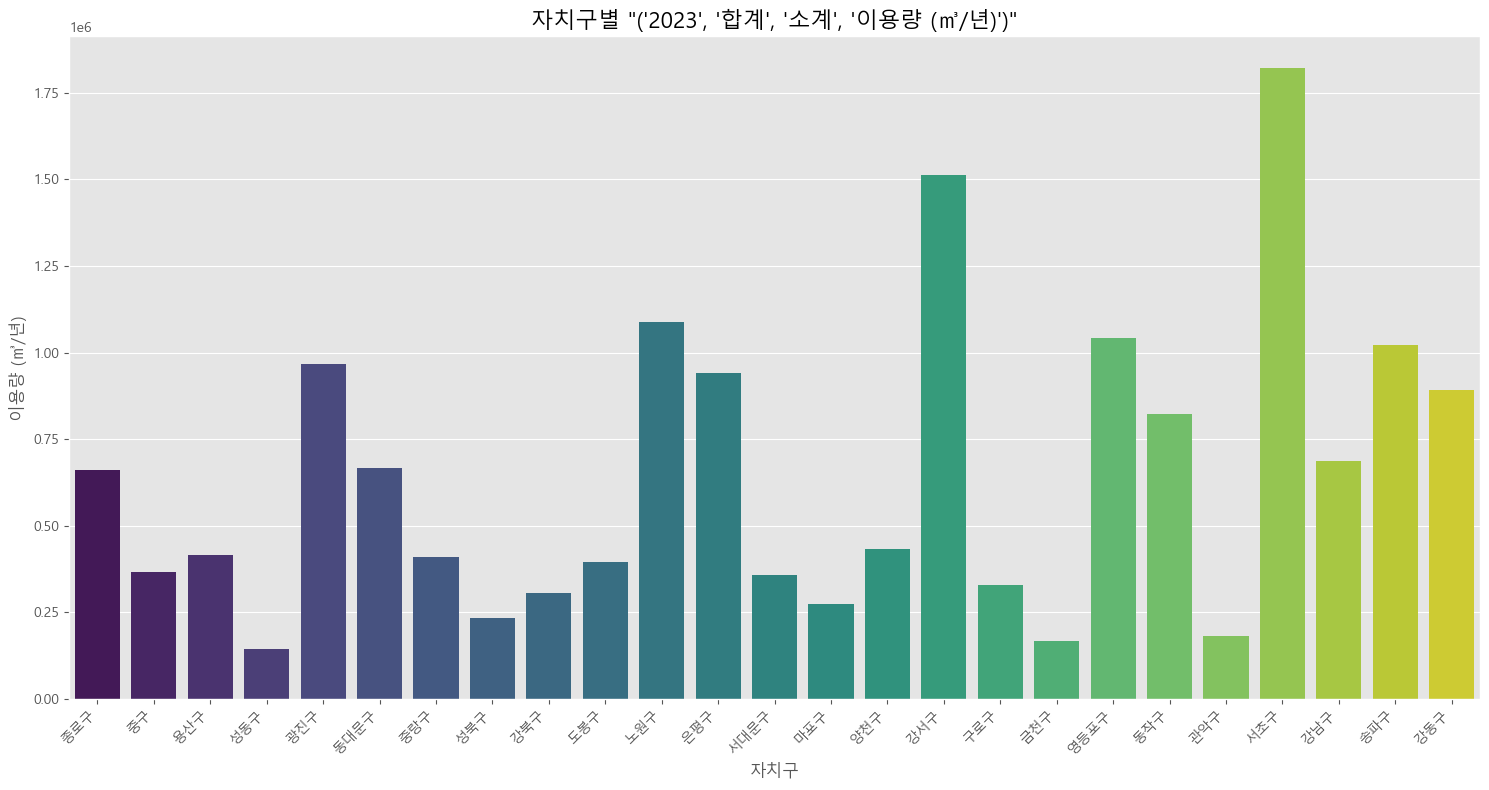

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np

# --- 한글 폰트 설정 (이전과 동일) ---
def get_korean_font():
    font_name = 'Malgun Gothic'
    if font_name in [f.name for f in fm.fontManager.ttflist]:
        return font_name
    else:
        print(f"'{font_name}' 폰트를 찾을 수 없습니다. 시스템에 설치된 다른 한글 폰트를 사용하거나 설치해주세요.")
        for f_name_candidate in ['NanumGothic', 'AppleGothic', 'Gulim', 'Dotum', '돋움', '맑은 고딕']:
            if f_name_candidate in [f.name for f in fm.fontManager.ttflist]:
                print(f"대신 '{f_name_candidate}' 폰트를 사용합니다.")
                return f_name_candidate
        print("적절한 한글 폰트를 찾지 못했습니다. 기본 sans-serif 폰트를 사용합니다 (한글이 깨질 수 있음).")
        return fm.FontProperties(family='sans-serif').get_name()

font_name = get_korean_font()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# --- 한글 폰트 설정 완료 ---

csv_file_path = r"C:\Users\yues7\data_B_project\data\지하수+이용+현황_20250601201952.csv"

try:
    print(f"CSV 파일을 로드합니다: {csv_file_path}")
    # 헤더는 4줄(0,1,2,3)로 지정하고, 인덱스는 CSV의 첫번째와 두번째 열을 사용하도록 index_col=[0,1] 설정
    df = pd.read_csv(csv_file_path, header=[0,1,2,3], index_col=[0,1], na_values=['-'])

    print("\n--- CSV 로드 직후 DataFrame 정보 ---")
    print("첫 3줄 데이터 (로드 직후):")
    print(df.head(3))
    print("\n로드 직후 DataFrame 인덱스 (MultiIndex):")
    print(df.index)
    print("\n로드 직후 DataFrame 컬럼 구조 (일부):")
    print(df.columns[:10])

    # --- ★★★ 인덱스 수정 시작 ★★★ ---
    print("\n인덱스를 자치구명으로 재설정합니다...")
    if isinstance(df.index, pd.MultiIndex) and df.index.nlevels == 2:
        # 현재 MultiIndex의 두 번째 레벨 값들 (소계, 종로구, 중구 등)을 새 인덱스로 사용
        df.index = df.index.get_level_values(1)
        df.index.name = '자치구' # 새 인덱스의 이름 설정
        print("\n자치구명으로 인덱스 재설정 후 첫 3줄 데이터:")
        print(df.head(3))
        print("\n재설정된 DataFrame 인덱스 (단일 인덱스):")
        print(df.index)
    else:
        print("경고: 예상한 MultiIndex(2레벨) 구조가 아닙니다. 인덱스 설정을 확인해주세요.")
        # 이 경우, df.index 와 df.head() 를 보고 수동으로 자치구 컬럼을 찾아 set_index 해야 할 수 있습니다.
    # --- ★★★ 인덱스 수정 종료 ★★★ ---

    # '소계' 행 (원래 전체 합계에 해당)이 있다면 시각화에서 제외
    # 인덱스 수정 후에는 '소계'가 단일 인덱스에 있는지 확인
    if '소계' in df.index:
        print("\n'소계' 행을 인덱스에서 제외합니다.")
        df_for_plot = df.drop('소계')
    else:
        print("\n'소계' 행이 인덱스에 없으므로 (이미 처리되었거나 없음) 현재 데이터를 사용합니다.")
        df_for_plot = df.copy()

    print("\n'소계' 행 제외 후 df_for_plot 인덱스:")
    print(df_for_plot.index)
    print("df_for_plot 첫 3줄:")
    print(df_for_plot.head(3))
    print(f"df_for_plot의 행 개수: {len(df_for_plot)}")


    # --- 데이터 시각화 시도 ---
    print("\n--- 데이터 시각화 준비 ---")
    
    # 시각화 대상 컬럼 선택: ('2023', '합계', '소계', '이용량 (㎥/년)')
    # 이 컬럼이 전체 이용량 합계로 보입니다.
    plot_column_name_tuple = ('2023', '합계', '소계', '이용량 (㎥/년)')
    
    # 사용자가 제목에서 '개소수 (개)'를 사용했으므로, 만약 '개소수'를 그리고 싶다면 아래 주석 해제
    # plot_column_name_tuple = ('2023', '합계', '소계', '개소수 (개소)')


    if plot_column_name_tuple in df_for_plot.columns:
        print(f"\n시각화 대상 컬럼: {plot_column_name_tuple}")
        
        data_selected_raw = df_for_plot[plot_column_name_tuple]
        print("\n--- 선택된 컬럼 원본 데이터 (data_selected_raw) ---")
        print(data_selected_raw.head())
        print(f"Data type: {data_selected_raw.dtype}")
        print(f"결측치 수 (제외 전): {data_selected_raw.isnull().sum()}")

        # 결측치가 있는 행은 시각화 전에 제외하거나 0으로 채울 수 있습니다. 여기서는 제외.
        data_to_plot_numeric_base = pd.to_numeric(data_selected_raw.astype(str).str.replace(',', '', regex=False), errors='coerce')
        data_to_plot_numeric = data_to_plot_numeric_base.dropna() # NaN 값 가진 행 제거

        print("\n--- 숫자형 변환 및 NaN 제거 후 데이터 (data_to_plot_numeric) ---")
        print(data_to_plot_numeric.head())
        print("기술 통계:")
        print(data_to_plot_numeric.describe())
        print(f"최종 시각화 데이터 개수: {len(data_to_plot_numeric)}")
        print("최종 시각화 데이터 인덱스:")
        print(data_to_plot_numeric.index) # ★★★ 이 인덱스가 자치구 이름이어야 함!

        if data_to_plot_numeric.empty:
            print("\n경고: 시각화할 데이터가 없습니다 (모두 NaN이거나 필터링 후 비었음).")
        elif not isinstance(data_to_plot_numeric.index, pd.Index) or data_to_plot_numeric.index.empty or pd.api.types.is_numeric_dtype(data_to_plot_numeric.index):
            print(f"\n경고: X축으로 사용될 인덱스가 올바르지 않습니다 (현재 인덱스: {type(data_to_plot_numeric.index)}). 자치구 이름이 인덱스로 설정되었는지 확인하세요.")
        else:
            plt.figure(figsize=(15, 8))
            y_label_text = plot_column_name_tuple[-1]
            
            sns.barplot(x=data_to_plot_numeric.index, y=data_to_plot_numeric.values, palette="viridis")
            plt.title(f'자치구별 "{plot_column_name_tuple}"', fontsize=16)
            plt.xlabel('자치구', fontsize=12)
            plt.ylabel(y_label_text, fontsize=12)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.tight_layout()
            plt.show()
    else:
        print(f"\n오류: 선택한 컬럼명 {plot_column_name_tuple}이 DataFrame에 없습니다.")
        print("사용 가능한 컬럼명 (일부):")
        for i, col_name in enumerate(df_for_plot.columns[:15]):
             print(f"  {col_name}")
        if len(df_for_plot.columns) > 15:
            print("  ...")

except FileNotFoundError:
    print(f"오류: CSV 파일을 찾을 수 없습니다. 경로를 확인해주세요: {csv_file_path}")
except Exception as e:
    print(f"\nCSV 파일 로드 또는 처리 중 오류 발생: {e}")
    import traceback
    traceback.print_exc() # 상세 오류 스택 출력